# Análise de Dados - Renda nos Estados Unidos

In [1]:
# Precisamos importar as bibliotecas necessárias.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Aqui, carreguei o dataset que estava no mesmo diretório onde ficava a pasta que foi submetida. Também troquei a estética
# do seaborn para ficar mais agradável.

df = pd.read_csv('../../adult.csv')

sns.set_style('darkgrid')

## Análise Inicial 

Primeiramente, usamos `df.head()`,`df.info()` e `df.describe()` para entender melhor o que está ocorrendo.

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47985 entries, 0 to 47984
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47985 non-null  int64 
 1   workclass        47985 non-null  object
 2   fnlwgt           47985 non-null  int64 
 3   education        47985 non-null  object
 4   educational-num  47985 non-null  int64 
 5   marital-status   47985 non-null  object
 6   occupation       47985 non-null  object
 7   relationship     47985 non-null  object
 8   race             47985 non-null  object
 9   gender           47985 non-null  object
 10  capital-gain     47985 non-null  int64 
 11  capital-loss     47985 non-null  int64 
 12  hours-per-week   47985 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           47985 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


Isso nos indica que temos $6$ features contínuas (contando o `fnlwgt`) e $9$ categóricas.

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,4.798500e+04,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,1.895940e+05,10.067229,1067.032093,87.370553,40.411483
std,13.729622,1.057605e+05,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Vemos que há algo um pouco estranho com os dados `capital-gain` e `capital-loss`. Eles têm médias (`mean`) muito baixas quando comparadas aos seus valores máximos, além de ter desvio padrão (`std`) muito altos, o que indica que há ___muita___ concentração de dados em alguma região. 

Para ter certeza, vamos fazer um `kdeplot` para averiguar isso. Para ambos os gráficos, coloco como pesos a coluna de pesos, `fnlwgt`. 

Text(0.5, 1.0, 'Densidade para capital-gain')

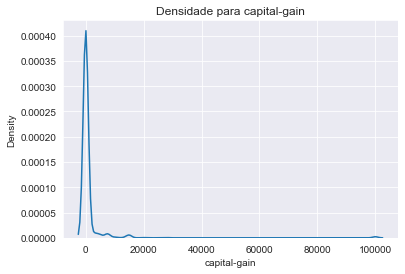

In [7]:
sns.kdeplot(data=df,x='capital-gain',weights='fnlwgt')
plt.title('Densidade para capital-gain')

Text(0.5, 1.0, 'Densidade para capital-loss')

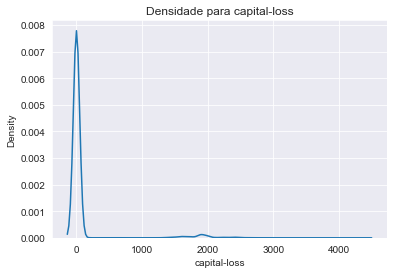

In [8]:
sns.kdeplot(data=df,x='capital-loss',weights='fnlwgt')
plt.title('Densidade para capital-loss')

De fato, há uma enorme concentração de dados em ambos os plots: entre $0$ e $20000$ para `capital-gain`, com um minúsculo pico acima de $90000$; e entre $0$ e $500$ para `capital-loss`, com outro pequeno pico em $\approx 2000$.

Logo, possivelmente serão necessários cortes para melhor analisar os dados, pois essas parcelas mais densas poderão ser mais significativas dependendo do contexto.

## Análise de Dados Contínuos

Antes de tudo, creio que fazer um `heatmap` vá nos ajudar a entender melhor os dados e nos guiar na hora de analisar cada _feature_ e suas correlações. 

Para isso, removo a coluna `fnlwgt`, pois é uma feature que apenas conta o número de pessoas, não valendo a pena utilizá-la no `heatmap`.

<function matplotlib.pyplot.show(close=None, block=None)>

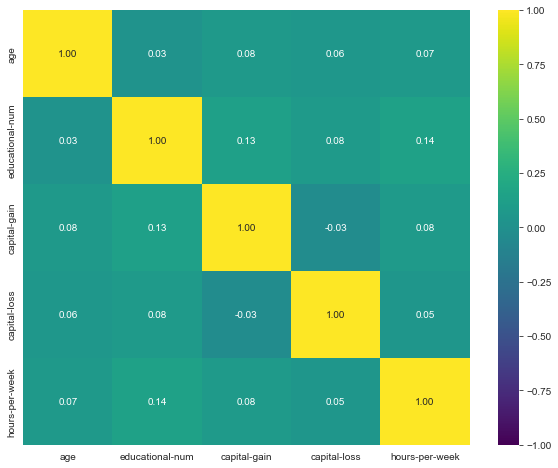

In [9]:
heat = df.drop('fnlwgt',axis=1)

plt.figure(figsize=(10, 8)) 
sns.heatmap(heat.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f',cmap='viridis')
plt.show

Vemos que as variáveis têm correlações bem próximas de zero (pouca corelação), com as maiores sendo entre `capital-gain` e `education-num`, e entre `hours-per-week` e `educational-num`. Isso sugere que pessoas com educação mais avançada tendem a trabalhar mais e também ganhar mais por origens além do trabalho.

### Análise das features individuais

#### Idades (`age`)

<AxesSubplot:xlabel='age', ylabel='Count'>

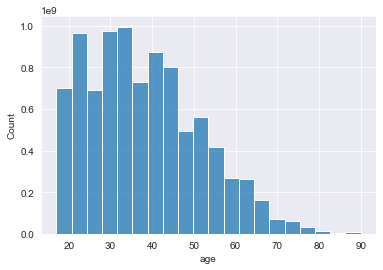

In [10]:
sns.histplot(data=df, x='age',weights='fnlwgt',bins=20)

Aqui vemos que a população não está envelhecendo demasiadamente, isto é, a maioria das pessoas está na faixa de $20$ a $50$ anos, então a maioria das pessoas participa da força de trabalho. Alguns países, principalmente alguns europeus, têm uma população mais idosa, na faixa de $60$ a $100$ anos, o que faz faltar força de trabalho e sobrar emprego!

#### Ganho de capital extrassalarial (`capital-gain`)

 Para uma melhor análise, vou fazer um corte nos dados, pois há uma concetração muito grande em regiões abaixo de $20000$.

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

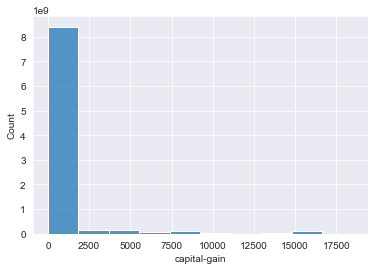

In [11]:
df1 = df.query('`capital-gain`<20000')

sns.histplot(data=df1, x='capital-gain',weights='fnlwgt',bins=10)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

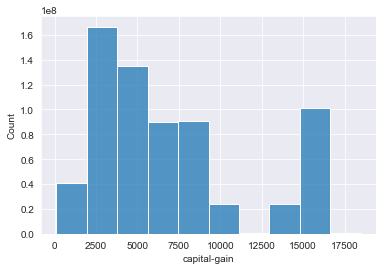

In [12]:
df1 = df.query('0<`capital-gain`<20000')

sns.histplot(data=df1, x='capital-gain',weights='fnlwgt',bins=10)

Ao compararmos os dois gráficos de ganho extrasalarial (a diferença é que o segundo exclui todos que têm ganho nulo), notamos que a esmagadora maioria das pessoas não ganha nada além de seu salário. Dos que ganham alguma coisa, a maioria está na faixa de $1000$ a $2500$ dólares.

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

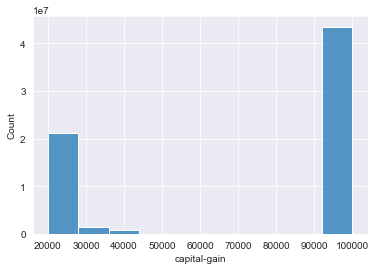

In [13]:
df1 = df.query('20000<`capital-gain`')

sns.histplot(data=df1, x='capital-gain',weights='fnlwgt',bins=10)

Quando observamos a população de maior ganho ($\geq 20000$ dólares), percebemos que há uma concentração na região mais baixa, seguida de um vazio, depois uma concentração enorme em um ganho altíssimo ($\geq 90000$ dólares).

#### Horas de trabalho semanais (`hours-per-week`)

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

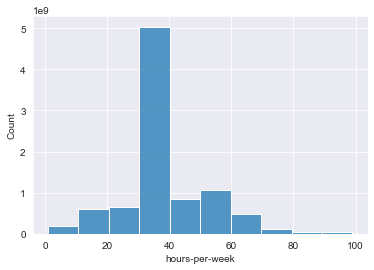

In [14]:
sns.histplot(data=df, x='hours-per-week',weights='fnlwgt',bins=10)

A grande maioria da população geral trabalha em torno de $30$ a $40$ horas por semana, ou seja, próximo de $8$ horas ao dia, todos os dias menos domingo, o que é esperado.

#### Perda de capital  (`capital-loss`)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

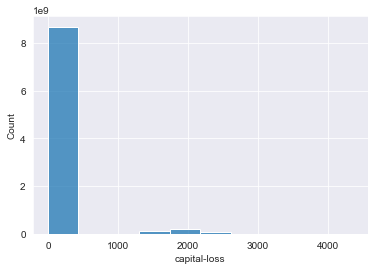

In [15]:
sns.histplot(data=df, x='capital-loss',weights='fnlwgt',bins=10)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

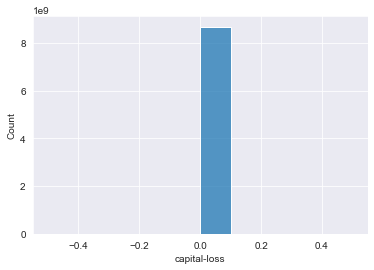

In [16]:
df2 = df.query('`capital-loss`<100')

sns.histplot(data=df2, x='capital-loss',weights='fnlwgt',bins=10)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

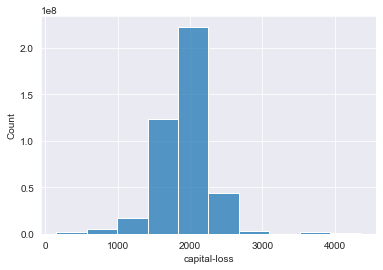

In [17]:
df2 = df.query('100<`capital-loss`')

sns.histplot(data=df2, x='capital-loss',weights='fnlwgt',bins=10)

Percebe-se que a esmagadora maioria das pessoas (em torno de $80$ milhões) perdem muito pouco - que possivelmente advém do pagamento e contas e despesas - mas há uma parcel da população ($\approx 20$ milhões) que perdem quantidades muito maiores de dinheiro - possivelmente despesas de donos de empresas. Porém, é claro, estas explicações são apenas conjecturas, é necessário mais dados para saber com certeza.

#### Nível educacional (`educational-num`)

<AxesSubplot:xlabel='educational-num', ylabel='Count'>

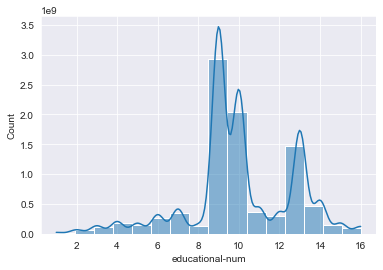

In [18]:
sns.histplot(data=df, x='educational-num',weights='fnlwgt',bins=16,kde=True)

Observa-se que a maioria da população está na média, mas há mais pessoas acima da média do que abaixo dela. A distribuição assemelha-se a uma gaussiana (porém com um "buraco" entre $10$ e $13$) deslocada para a direita, o que indica uma maioria acima da média.

### Análise das correlações entre as features contínuas

É interessante visualizarmos as features que tiveram correlações mais altas no `heatmap`.

#### Ganho extrassalarial e nível educacional (`capital-gain` e `educational-num`)

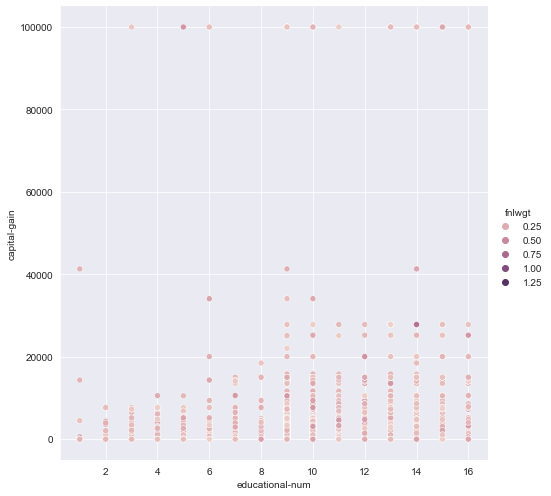

In [19]:
sns.relplot(y='capital-gain', x='educational-num', data = df, kind='scatter',hue='fnlwgt', height = 7,alpha=1)

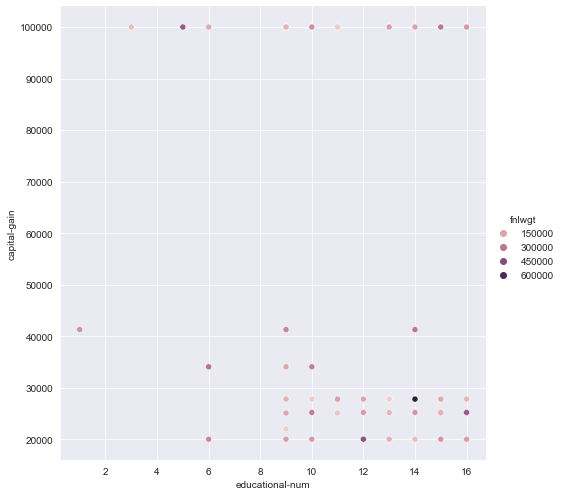

In [20]:
sns.relplot(y='capital-gain', x='educational-num', data = df1, kind='scatter',hue='fnlwgt', height = 7,alpha=1)

Realmente é possível identificar uma tendência leve - porém não o suficiente para precisar de uma trendline. Fica claro que a maioria das pessoas com nível educacional muito baixo ($\leq 6$) não têm renda extrasalarial alta; porém, pessoas com nível acima de $6$ tendem a ter rendas semelhantes.

É interessante notar que, dentre as pessoas com renda extrasalarial altíssima ($\geq 80000$), não há um nível educacional muito predominante; as pessoas estão distribuídas aproximadamente igualmente entre os níveis educacionais, faltando apenas pessoas com nível $\leq 2$.

#### Horas de trabalho semanais e nível educacional (`hours-per-week` e `educacional-num`)

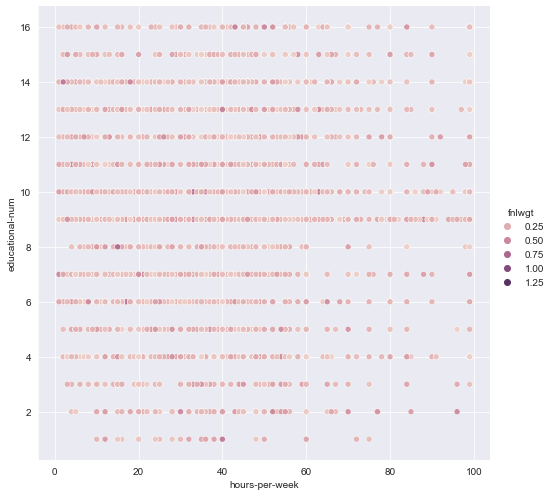

In [21]:
sns.relplot(x='hours-per-week', y='educational-num', data = df,hue='fnlwgt', height = 7,alpha=1)

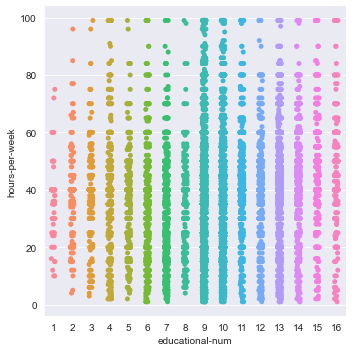

In [22]:
sns.catplot(x='educational-num',y='hours-per-week', data=df, kind='strip')

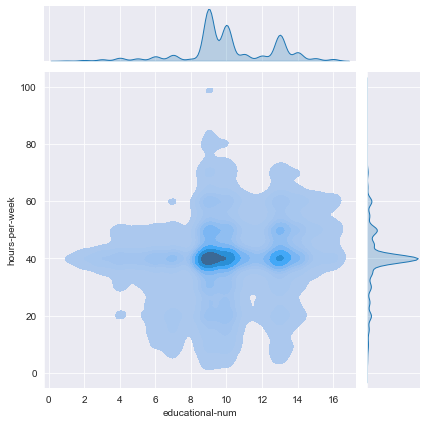

In [23]:
sns.jointplot(x='educational-num', y='hours-per-week', data=df, kind = 'kde',fill=True)

Novamente é possível notar uma pequena tendência de pessoas com nível educacional baixo também trabalham por menos horas por semana - como é possível notar nos dois primeiros gráficos - mas a grande maioria das pessoas fica em torno de $40$ horas de trabalho semanais, independente do nível educacional.

Além disso, há um pico - visível no terceiro gráfico - em pessoas que têm nível educacional mediano (próximo de $9$) e trabalham $40$ horas semanais, ou seja, indica a maioria de pessoas do país. Há um pico menor em pessoas de nível educacional um pouco mais elevado (próximo de $13$) que trabalham a mesma quantidade, indicando uma segunda maioria.

Finalmente, o grupo de nível educacional mediano é o maior e o mais diversificado, tendo uma grande variedade de horas de trabalho semanais. É também maioria entre os que trabalham muito ($\geq 60$ horas semanais).

#### Idades e ganho extrassalarial (`age` e `capital-gain`)

Apesar de não serem muito correlacionados, é interessante ver a relação entre idade e ganho de capital:

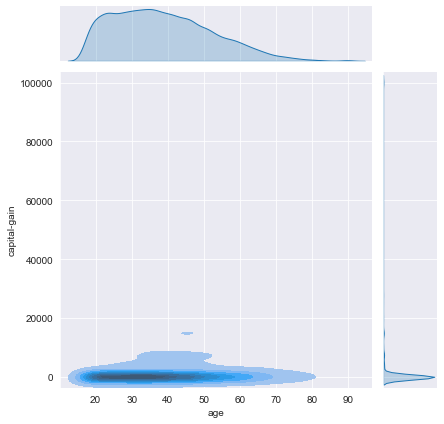

In [157]:
sns.jointplot(x='age', y='capital-gain', data=df, kind = 'kde',fill=True)

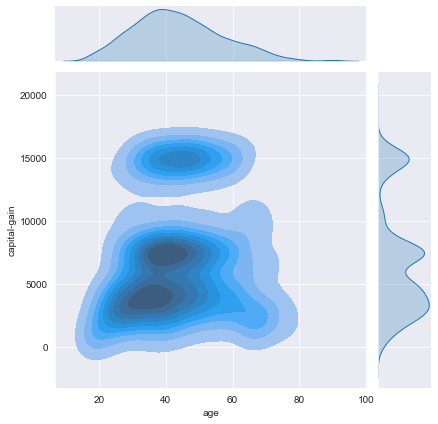

In [171]:
sns.jointplot(x='age', y='capital-gain', data=df1, kind = 'kde',fill=True)

A distribuição parece um tanto uniforme em termos de idades. Após cortarmos para remover aqueles que não ganham nada e aqueles que ganham muito (pois há uma grande concentração na parte inferior do gráfico), temos uma distribuição relativamente uniforme. É claro, há um pico entre as idades de $20$ e $50$, mas aí temos uma maioria na população - tanto que a idade média é $38$ anos. 

Além disso, percebemos que pessoas com idades menores ($\leq 20$ anos) parecem tender a ter menos ganhos extrassalariais, mas isso se deve pelo fato de serem menores de idade que, muitas vezes, nem ingressaram no mercado de trabalho e portanto não possuem alto ganho de capital. Para pessoas idosas ($\geq 60$ anos), o mesmo ocorre, mas pode ser devido a serem aposentadas ou falecidas no momento da coleta de dados (e, portanto, não contabilizadas), já que são poucas aquelas chegam a idades muito avançadas.

Podemos excluir esses dois grupos, que não são de interesse:

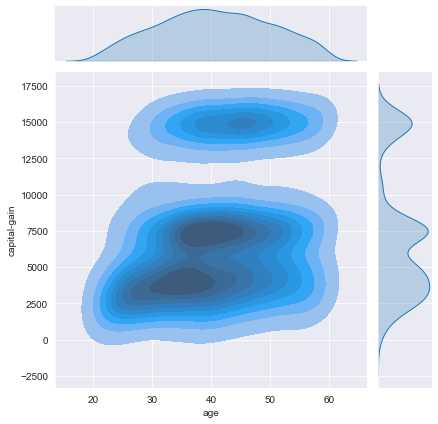

In [173]:
df3 = df1.query('20<age<60')

sns.jointplot(x='age', y='capital-gain', data=df3, kind = 'kde',fill=True)

E agora temos uma distribuição bem mais uniformizada, com picos em torno da média. A única conclusão interessante é que as pessoas com renda extrassalarial elevada ($\geq 12500$ dólares) tendem a ser um pouco mais velhas ($\geq 30$ anos). Ou seja, são pessoas que já estão a algum tempo no mercado de trabalho. Possivelmente isso ocorre porque essas pessoas arrecadaram investimento desde sua entrada no mercado de trabalho e agora estão com um ganho maior (novamente, apenas conjectura).

#### Correlacionando as três primeiras features

Por fim, podemos _plotar_ as três features que têm certa correlação - `capital-gain`,`educational-num` e `hours-per-week` - para observarmos alguma conexão entre as três:

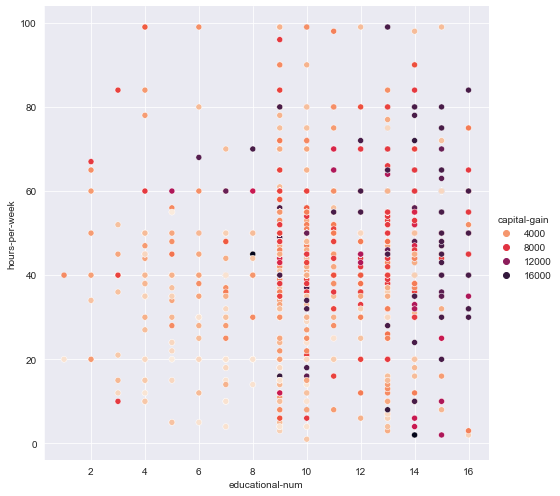

In [24]:
df1 = df.query('0<`capital-gain`<20000')

sns.relplot(y='hours-per-week', x='educational-num', data = df1,hue='capital-gain',height=7,palette='rocket_r')

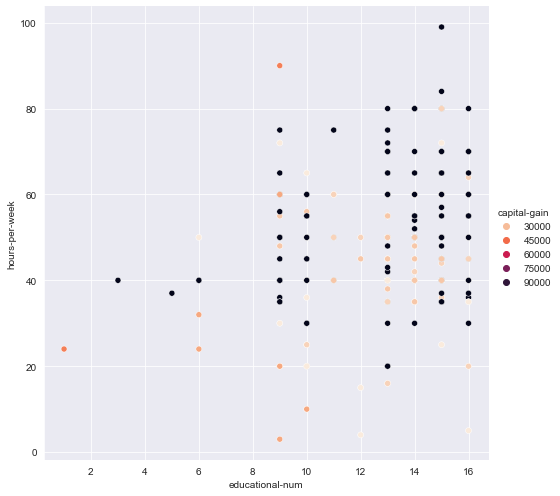

In [25]:
df1 = df.query('20000< `capital-gain`')

sns.relplot(y='hours-per-week', x='educational-num', data = df1,hue='capital-gain',height=7,palette='rocket_r')

Analisando o primeiro gráfico (que expõe o primeiro pico de `capital-gain`), nota-se que os pontos mais coloridos - i.e. pessoas que mais ganham além de seu salário - ficam na parte direita do gráfico, indicando que esse grupo é majoritariamente acima da média em termos de escolaridade; mas, ao mesmo tempo, estão bem destribuídos em termos de horas de trabalho, ou seja, ganhar mais além de seu salário não implica trabalhar mais, e vice-versa.

Quanto ao segundo gráfico (segundo pico de `capital-gain`), é possível notar que os que possuem extremo ganho extrassalarial ($\approx 90000 $, são outliers) tendem a se concentrar no lado direito - nível educacional acima da média - mas mesmo assim estão bem distribuídos em termos de horas de trabalho semanal, da mesma forma que o primeiro gráfico.


É importante ressaltar que foram excluídos todos os que nada ganham, pois seu volume é muito alto, o que compromete a visualização:

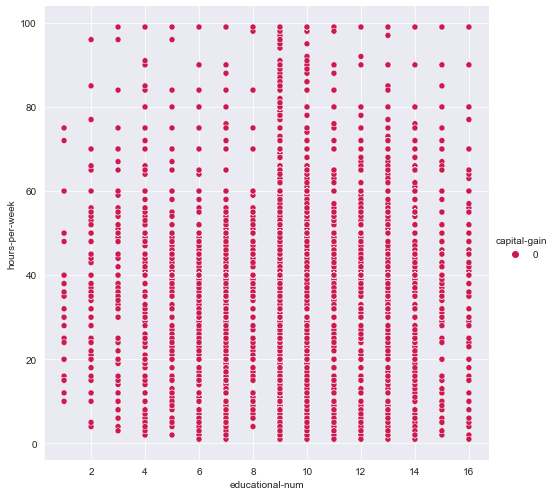

In [26]:
df4 = df.query('0==`capital-gain`')

sns.relplot(y='hours-per-week', x='educational-num', data = df4,hue='capital-gain',height=7,palette='rocket_r')

A população de ganho nulo é amplamente distribuída em termos de educação e horas de trabalho semanais, além de ser a população majoritária. Nenhuma correlação aparente.

Agora, dentre os outliers que trabalham pouco, isto é, em torno de $4$ horas ao dia, todos os dias menos domingo:

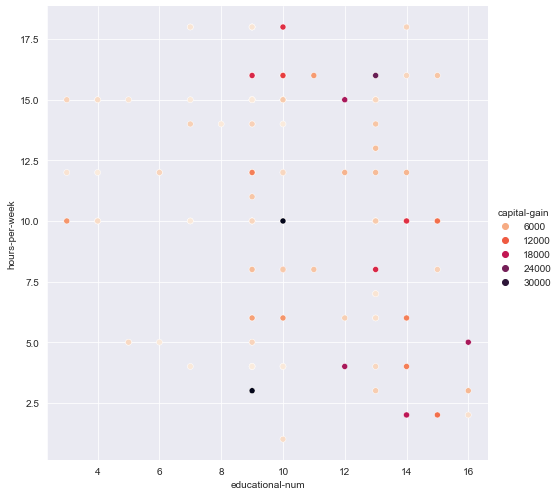

In [27]:
df5 = df.query('`hours-per-week`<20')
df5=df5[df5['capital-gain']> 0]

sns.relplot(y='hours-per-week', x='educational-num', data = df5,hue='capital-gain',height=7,palette='rocket_r')

É possível notar que as pessoas que menos trabalham tendem a ganhar acima de $6000$ dólares além do salário, e têm nível educacional acima da média, porém não é exatamente uma correlação direta.

## Análise de features categóricas

Primeiro, vamos averiguar quais são as categorias em cada feature:

In [28]:
for feature in df.columns:
    if df[feature].dtype == object:
        series = df[feature].unique()
        print(feature + ', len = '+ str(len(series)))
        print(series)
        print('\n')

workclass, len = 8
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


education, len = 16
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']


marital-status, len = 7
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation, len = 14
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


relationship, len = 6
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


race, len = 5
['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']


gender, len = 2
['Male' 'Female']


native-country, len = 41
['United-States' 'Peru' 

Pronto, com esse código podemos ver quantas categorias há em cada feature (em `len = `) e quais são as categorias. Diferentemente das features contínuas, não podemos fazer um `heatmap` desta vez! 

### Análise das features individuais

#### Renda final (`income`)

Como o objetivo é observar as características da população e a relação com a sua renda final, é de suma importância verificarmos a distribuição da renda final na população:

<AxesSubplot:xlabel='income', ylabel='Count'>

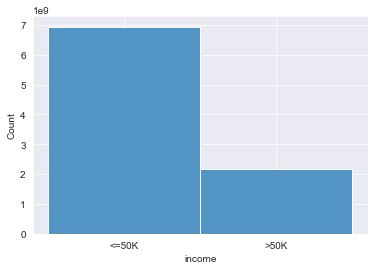

In [29]:
sns.histplot(data=df, x='income',weights='fnlwgt')

Claramente, a renda não é distribuída uniformemente. A quantidade de pessoas menos ricas ($\leq 50$ mil dólares) é mais do triplo ($\approx 350 \%$) população de pessoas mais ricas ($<50$ mil dólares).

<br>

Outras features úteis são características não-econômicas de cada pessoa, ou seja, características que, na teoria, não deveriam afetar a sua renda - a não ser que haja algum efeito que não fora levado em considerção. Estas são: etnia, gênero, relacionamento e país de origem:

#### Etnia (`race`)

<AxesSubplot:xlabel='race', ylabel='Count'>

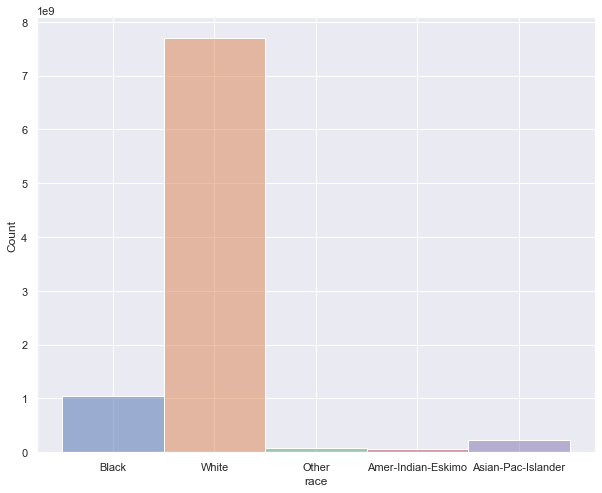

In [31]:
sns.set(rc={"figure.figsize":(10, 8)})

sns.histplot(data=df, x='race',weights='fnlwgt',hue='race',legend=False)

Aqui podemos ver a esmagadora predominância de pessoas brancas no país. Por isso, ao fazermos uma análise por etnia, precisaremos analisar _proporcionalmente,_ ou seja, tabalharemos com porcentagens por grupo no lugar de população absoluta.

A segunda maior etnia é a negra, que é muitas vezes maior que as etnias menores que ela - apesar de também ser muitas vezes menor em número que pessoas brancas. O restante é levemente mais uniforme, como podemos ver:

<AxesSubplot:xlabel='race', ylabel='Count'>

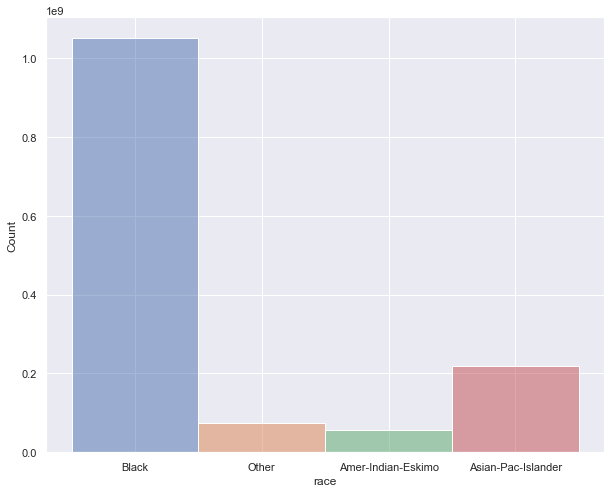

In [32]:
dfrace = df.query('race != "White"')

sns.histplot(data=dfrace, x="race",weights='fnlwgt',hue='race',legend=False)

<AxesSubplot:xlabel='race', ylabel='Count'>

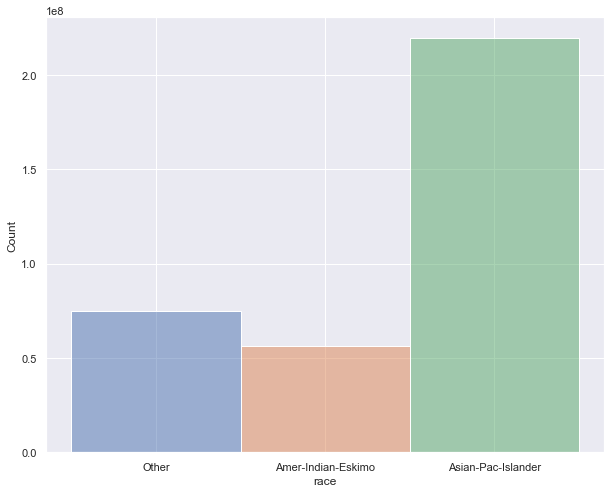

In [33]:
dfrace = dfrace.query('race != "Black"')
sns.histplot(data=dfrace, x="race",weights='fnlwgt',hue='race',legend=False)

#### Gênero (`gender`)

<AxesSubplot:xlabel='gender', ylabel='Count'>

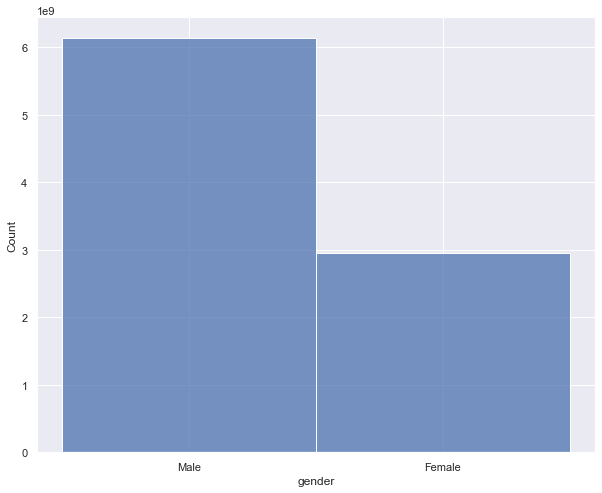

In [34]:
sns.histplot(data=df, x='gender',weights='fnlwgt')

Quanto ao gênero, percebe-se que há uma grande predominância masculina nos dados.

#### Estado Civil (`marital-status`)

<AxesSubplot:xlabel='marital-status', ylabel='Count'>

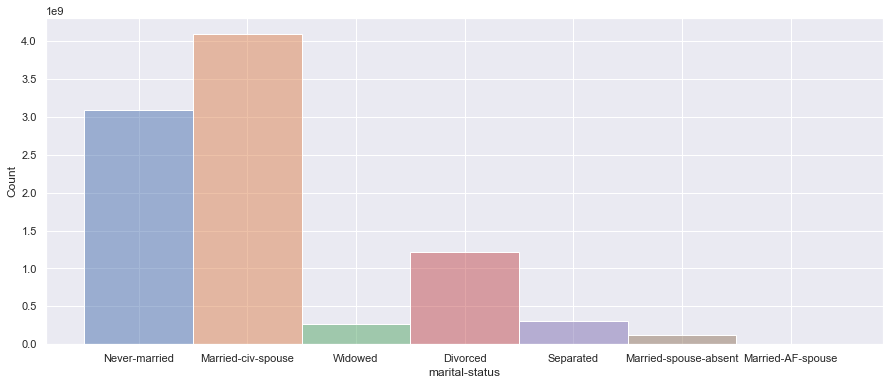

In [35]:
sns.set(rc={"figure.figsize":(15, 6)})

sns.histplot(data=df, x='marital-status',weights='fnlwgt',hue='marital-status',legend=False)

Há uma enorme maioria de pessoas casadas ou que nunca casaram, o que pode distorcer os dados um pouco. Essa predominância de pessoas que nunca casaram pode ser relacioanda com as idades: pessoas mais novas tendem a não serem casadas ainda.

#### Relação com a família (`relationship`)

<AxesSubplot:xlabel='relationship', ylabel='Count'>

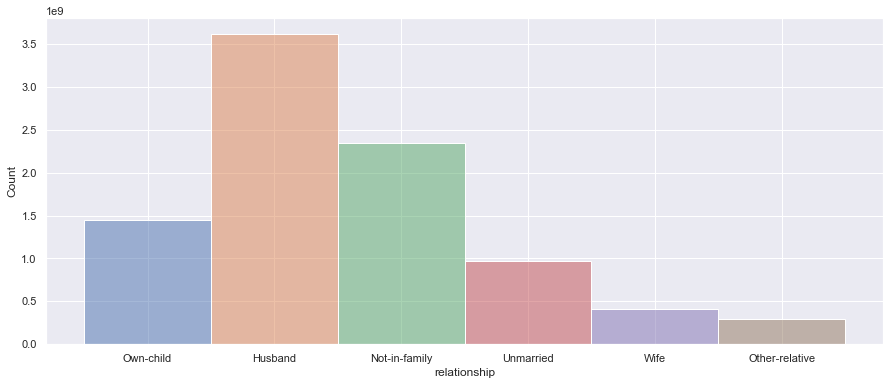

In [36]:
sns.histplot(data=df, x='relationship',weights='fnlwgt',hue='relationship',legend=False)

Aqui temos o relacionamento com o restante da família. Claramente, há uma quantidade muito maior de maridos do que esposas, mas isso pode ser explicado pela predominância masculina nos dados.

#### Nacionalidade (`native-country`)

Finalmente, nas nacionalidades a população majoritária é nativa dos Estados Unidos, e logo após, México. Após removermos esses dois países, o restante é um pouco mais uniforme, e bem diversificado.

<AxesSubplot:xlabel='native-country', ylabel='Count'>

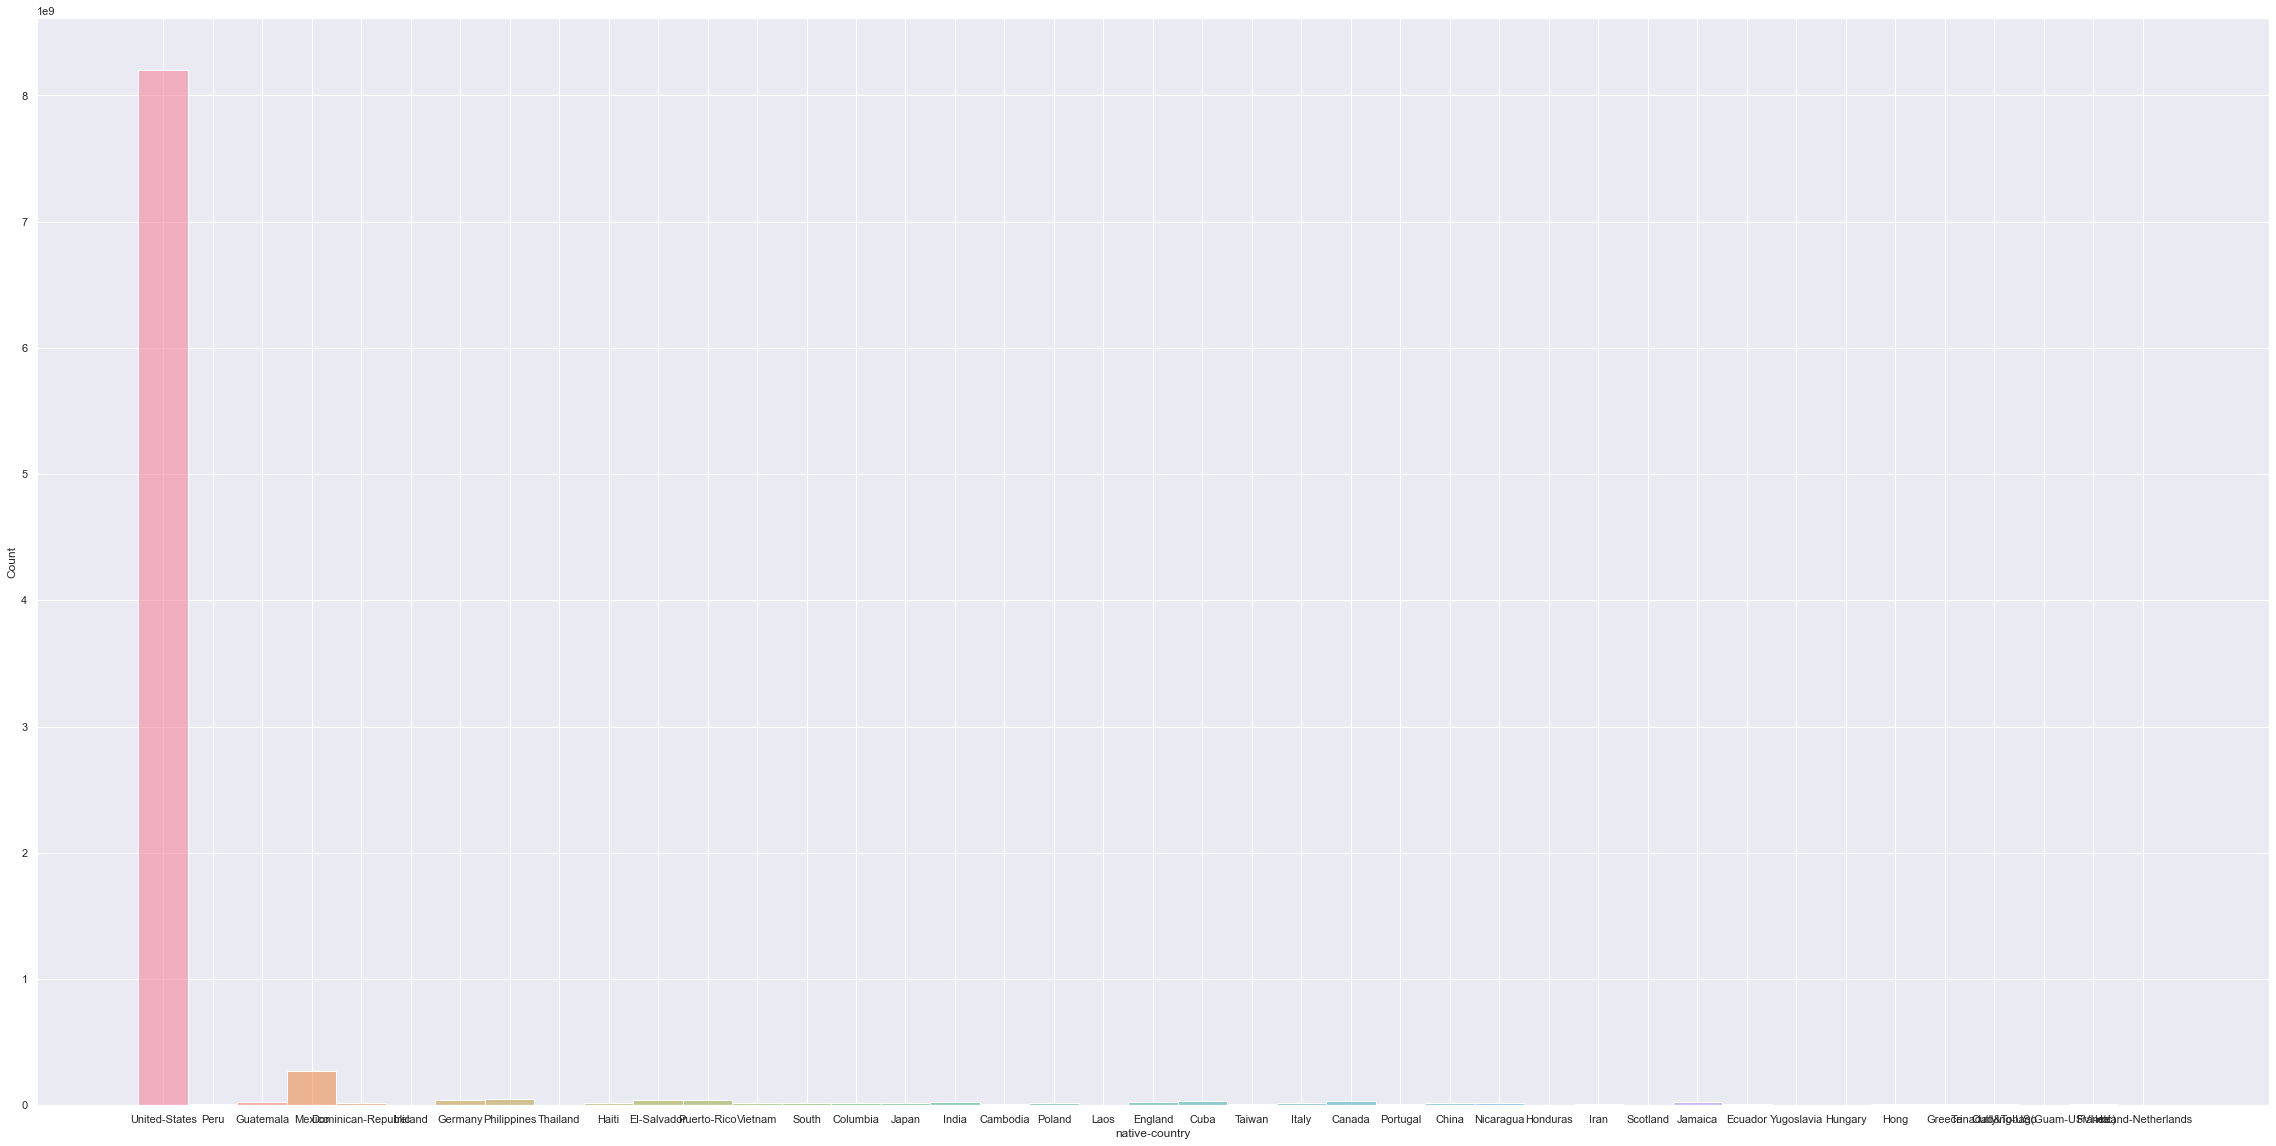

In [37]:
sns.set(rc={"figure.figsize":(40, 20)})

sns.histplot(data=df, x='native-country',weights='fnlwgt',hue='native-country',legend=False)

<AxesSubplot:xlabel='native-country', ylabel='Count'>

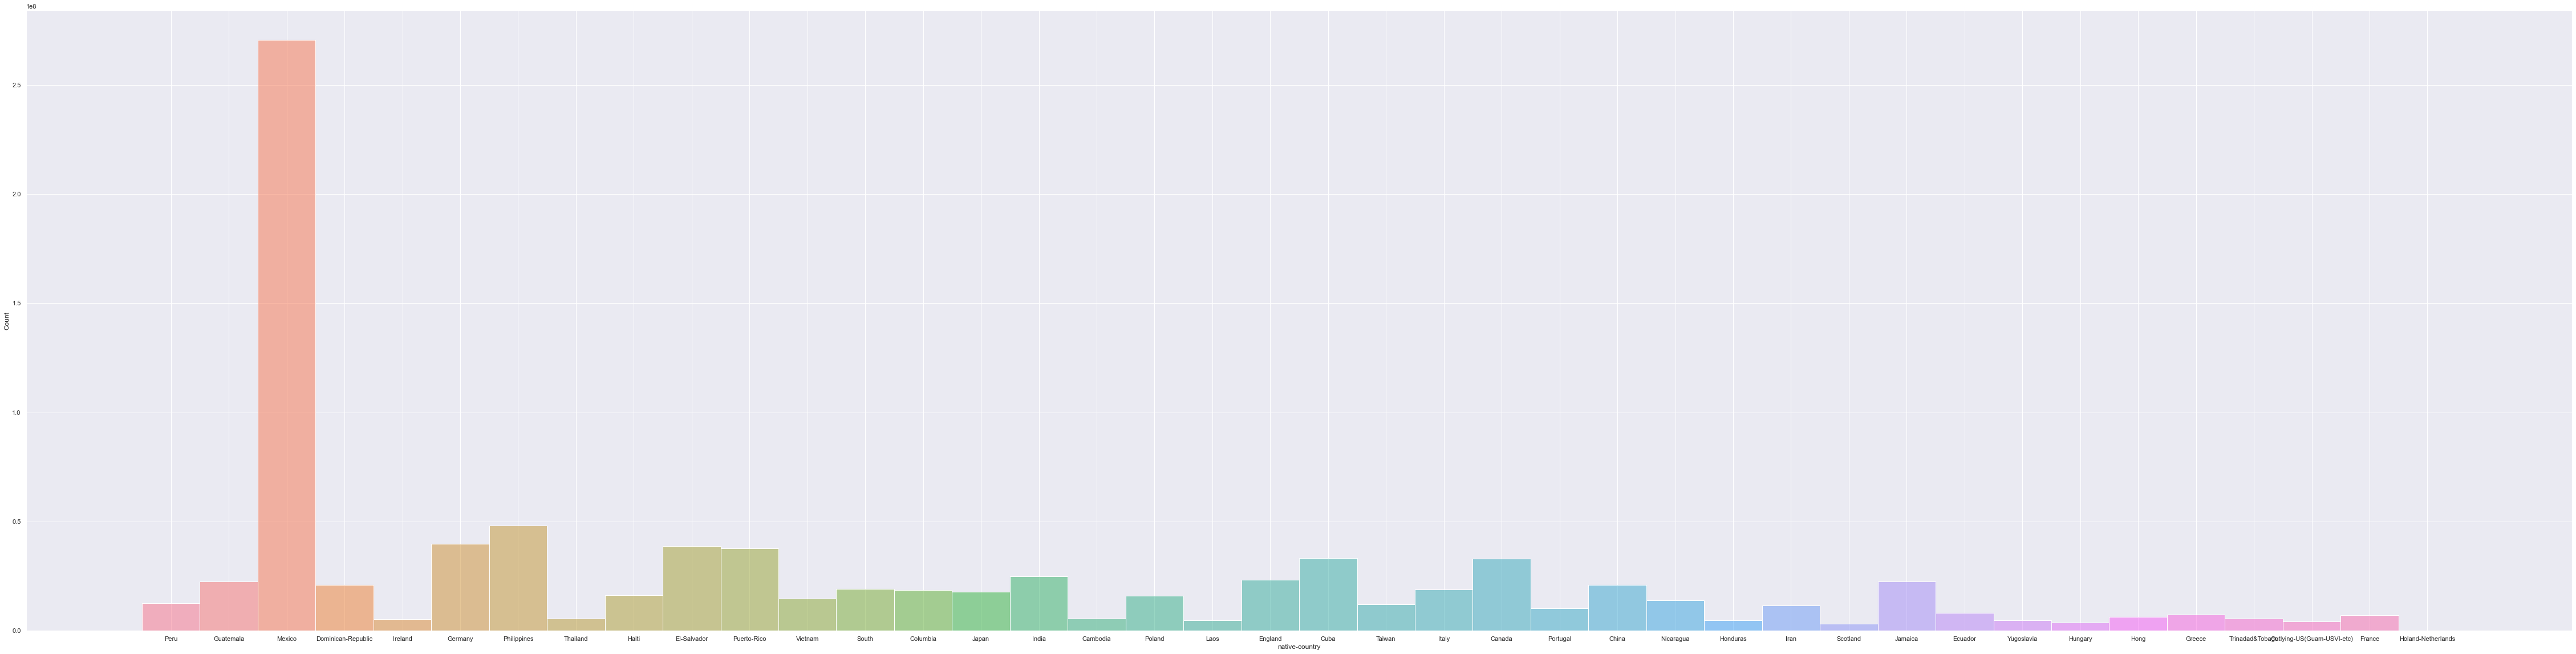

In [256]:
sns.set(rc={"figure.figsize":(80, 20)})

df6 = df[df['native-country']!= "United-States"]

sns.histplot(data=df6, x='native-country',weights='fnlwgt',hue='native-country',legend=False)

<AxesSubplot:xlabel='native-country', ylabel='Count'>

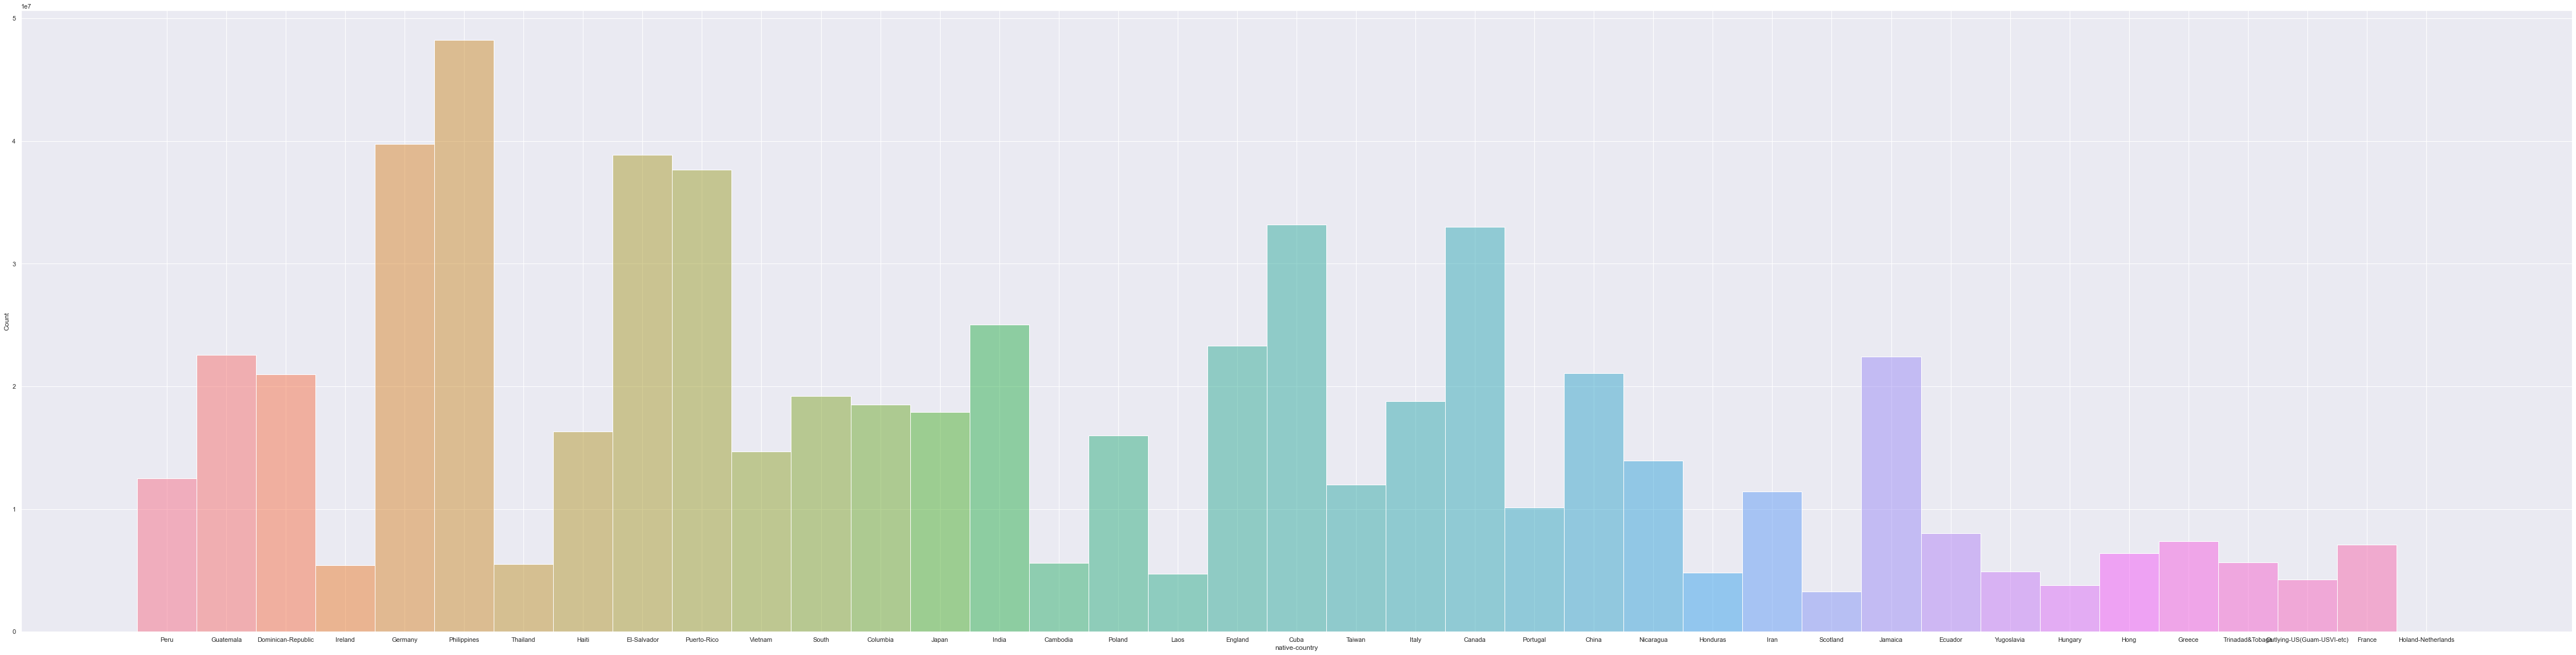

In [259]:
sns.set(rc={"figure.figsize":(80, 20)})

df6 = df6[df6['native-country']!= "Mexico"]

sns.histplot(data=df6, x='native-country',weights='fnlwgt',hue='native-country',legend=False)

<br>

Agora, partimos para as features que têm direta influência na renda da população: _workclass,_ ocupação e educação:

#### Classe de trabalho (`workclass`)

<AxesSubplot:xlabel='workclass', ylabel='Count'>

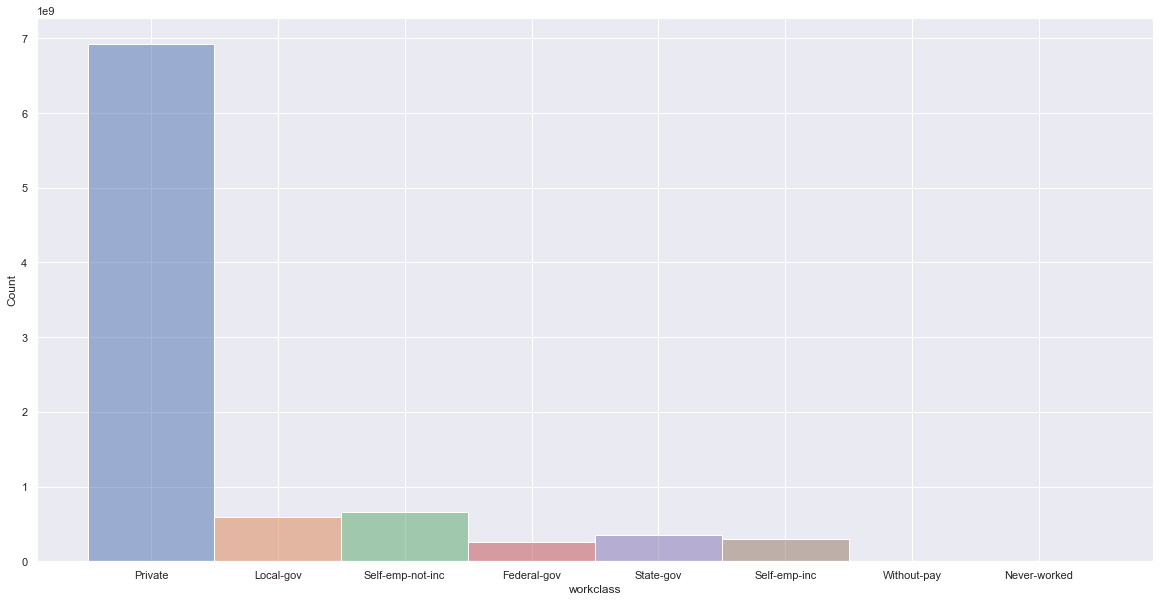

In [8]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.histplot(data=df, x='workclass',weights='fnlwgt',hue='workclass',legend=False)

<AxesSubplot:xlabel='workclass', ylabel='Count'>

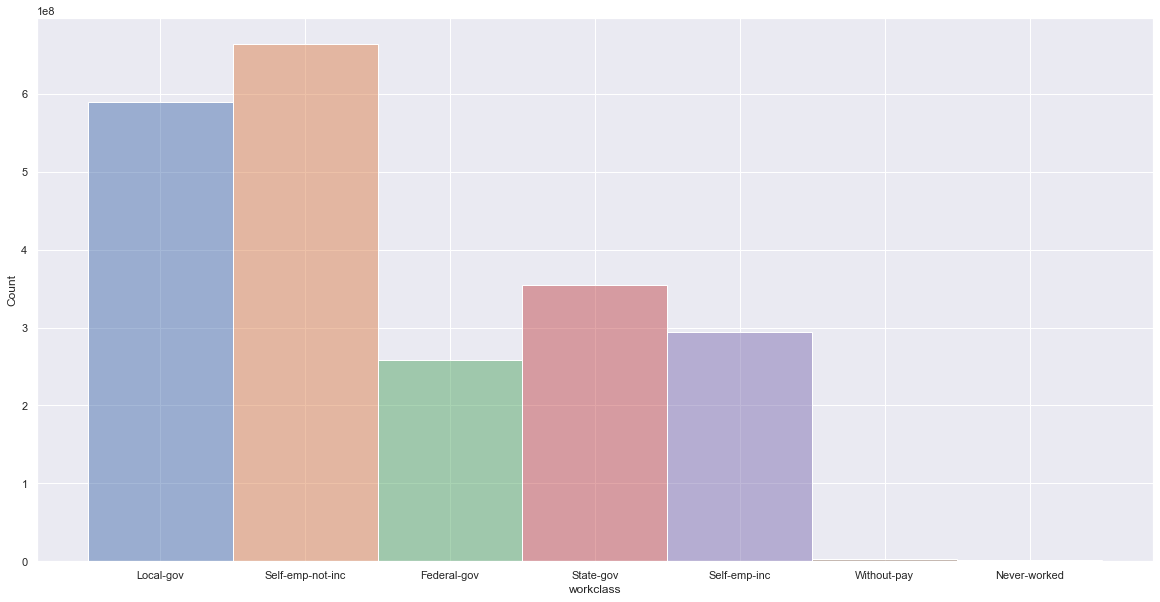

In [296]:
dfclass = df.query('workclass != "Private"')

sns.histplot(data=dfclass, x='workclass',weights='fnlwgt',hue='workclass',legend=False)

Aqui percebemos uma grande maioria de trabalhadores do setor privado. Ao os excluirmos, vemos que o restante é um pouco mais uniforme, com uma maioiria de _self-employed_. Vemos que há mais empregados de governos locais do que governo federal: isso é um indicador que os estados e municípios nos Estados Unidos têm bastante agência em seus territórios.

Além disso, o fato de terem pouquíssimas pessoas que nunca trabalharam, indica que os cidadões dos Estados Unidos tendem a entrar no mercado de trabalho cedo (pelo menos até os $17$ anos, que é a idade mínima do dataset).

#### Escolaridade (`education`)

<AxesSubplot:xlabel='education', ylabel='Count'>

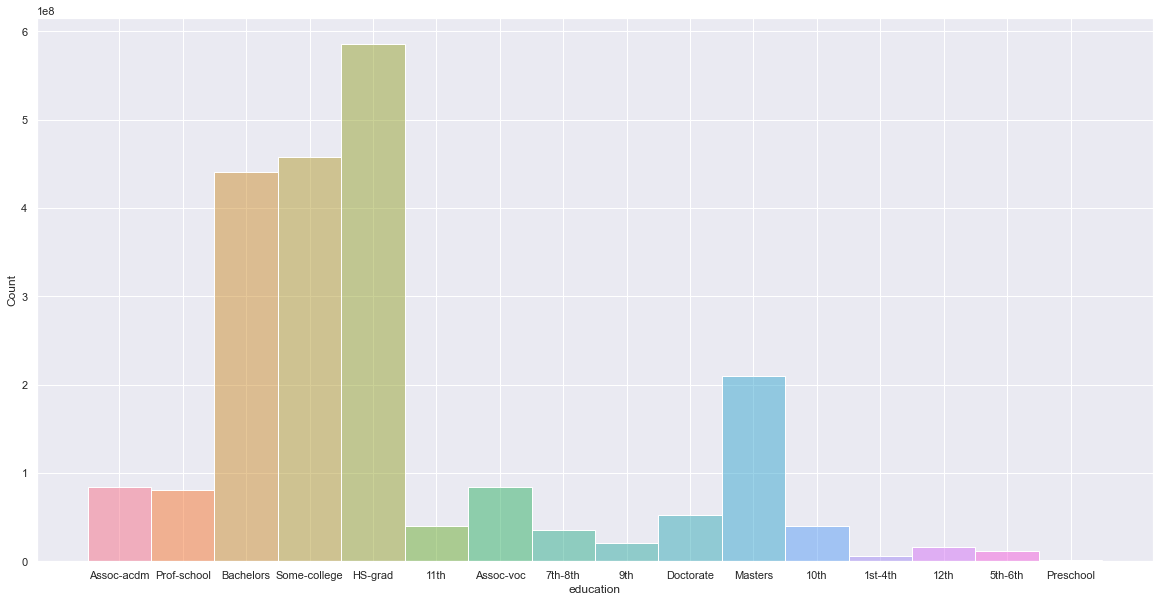

In [297]:
sns.histplot(data=dfclass, x='education',weights='fnlwgt',hue='education',legend=False)

Temos uma maioria de pessoas formadas no ensino médio e formadas em graduação, com uma pequena minoria de pessoas que não completaram nem o ensino médio, o que indica uma boa escolaridade média. Porém, poucos vão além da graduação: há poucos mestres e ainda menos doutores no país.

#### Ocupação (`occupation`)

<AxesSubplot:xlabel='occupation', ylabel='Count'>

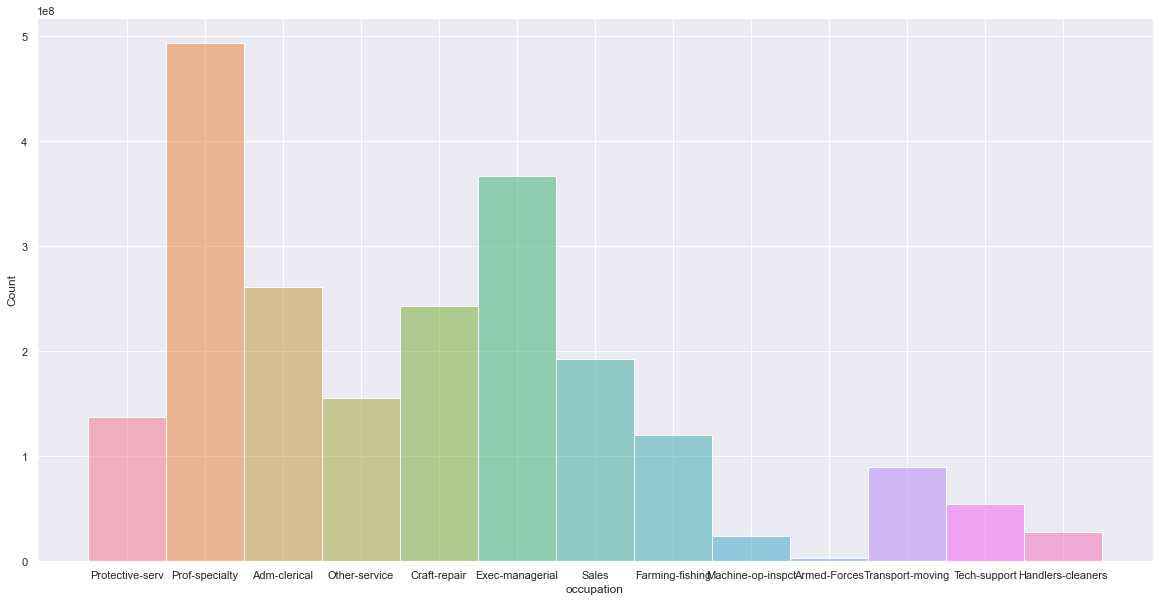

In [299]:
sns.histplot(data=dfclass, x='occupation',weights='fnlwgt',hue='occupation',legend=False)

Aqui temos uma grande maioria de profissões especialistas (`Prof-specialty`) e uma minoria de profissões que requerem menos escolaridade (como `Farming-fishing`, `Handlers-cleaners` e `Armed-Forces`)  o que bate com o grande número de pessoas que já se formaram em alguma faculdade,

### Análise das correlações entre features categóricas

Começamos comparando as features com a que nos interessa, a renda final `income`. Vamos verificar as features não-econômicas:

#### Etnia e renda (`race` e `income`)

<AxesSubplot:xlabel='income', ylabel='Percent'>

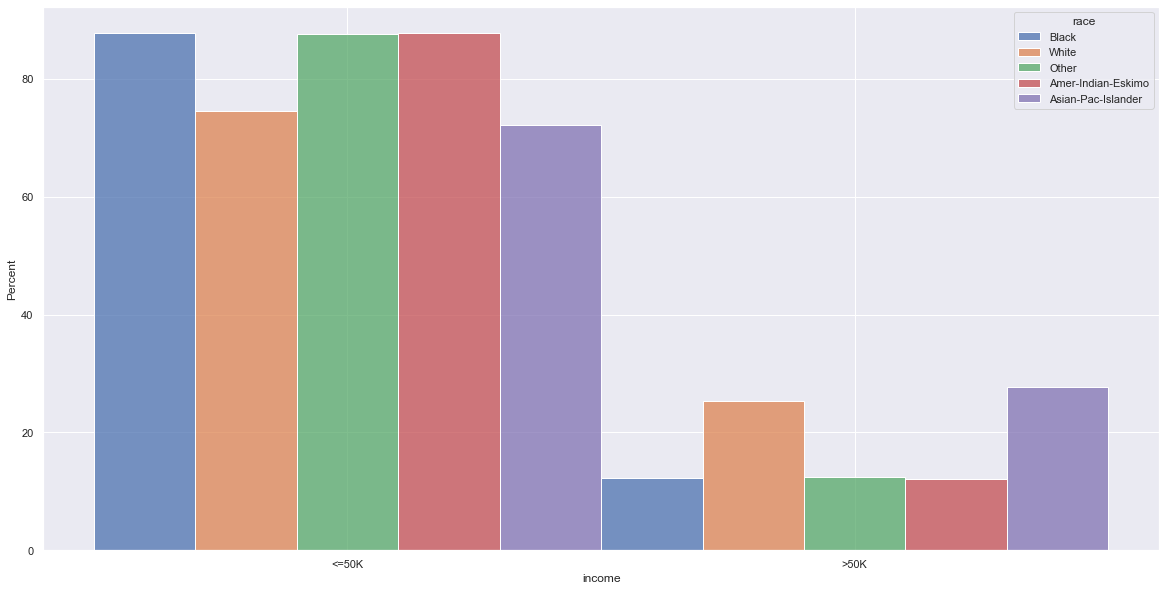

In [308]:
sns.histplot(x='income',hue='race',data=df,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

Aqui temos um histograma semelhante ao que utilizamos para averiguar a feature `income`, mas dessa vez, separado por etnia e normalizado em porcentagem. Além disso, graças ao `common_norm = False`, o histograma de cada etnia é normalizado individualmente, isto é, a soma de cada um totaliza $100\%$. 

Isso nos permite analisar a distribuição de renda por etnia sem nos preocupar com cada grupo ser de tamanhos muito diferentes - há muito mais pessoas brancas e negras do que de outras etnias, por exemplo.

As etnias mais ricas são a branca (`White`) e "asiáticos e nativos das ilhas do Pacífico" (`Asian-Pac-Islander`, um termo utilizado em estudos demográficos dos Estados Unidos). O primeiro grupo tem $\approx 25\%$ de sua população com alta renda total, e o segundo tem um pouco mais, em torno de $28\%$. Pode se fazer um argumento que pessoas brancas nos EUA são favorecidas, pois, são um grupo muito grande e diverso (população representativa), mas mesmo assim têm uma maior parcela de sua população com renda alta quando comparadas com outras etnias.

Para o segundo grupo, é possível que ele não seja exatamente representativo das relações étnico-raciais dos EUA, por ser um grupo muito pequeno (menos de $5\%$ da população). Pode ser o caso, por exemplo, que essas pessoas são imigrantes que já tinham renda alta ou descendentes desses imigrantes (o que não pode ser dito para pessoas brancas, pois são um grupo enorme); então, é necessária uma melhor análise.

Além disso, a menos rica é a etnia negra, que tem aproximadamente $15\%$ de sua população com renda alta. Esse é o segundo maior grupo ($10\%$ da população), então podemos assumir que é uma parcela representativa.

O gráfico abaixo mostra a distribuição populacional por etnia em porcentagens:

<AxesSubplot:xlabel='race', ylabel='Percent'>

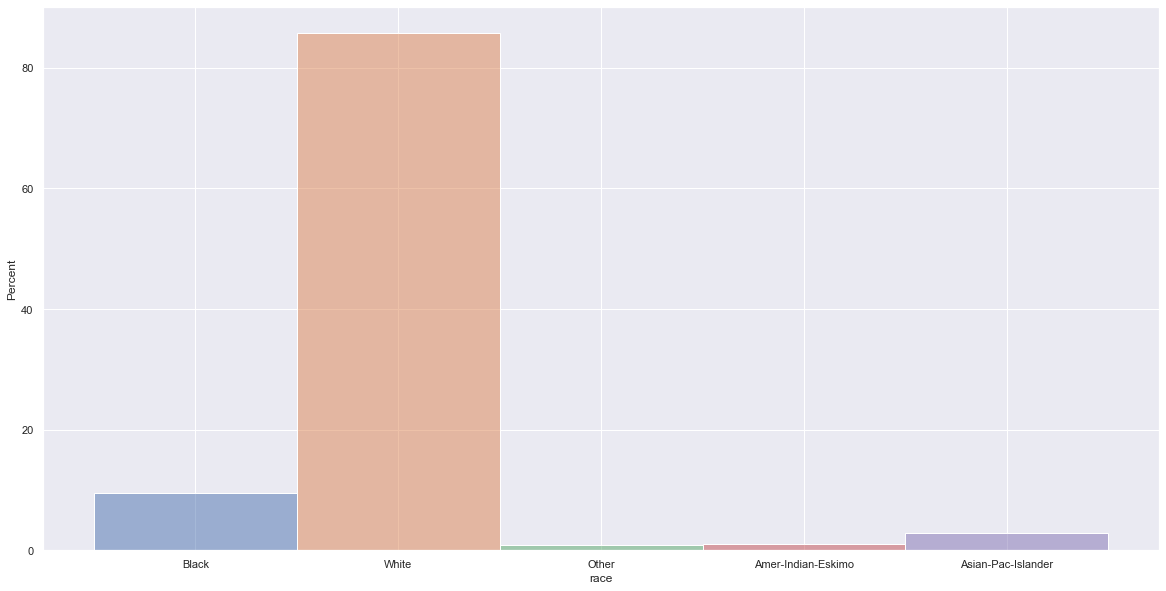

In [309]:
sns.histplot(data=df, x='race',weights='fnlwgt',hue='race',legend=False, stat='percent')

#### Gênero e renda (`gender` e `income`)

<AxesSubplot:xlabel='income', ylabel='Percent'>

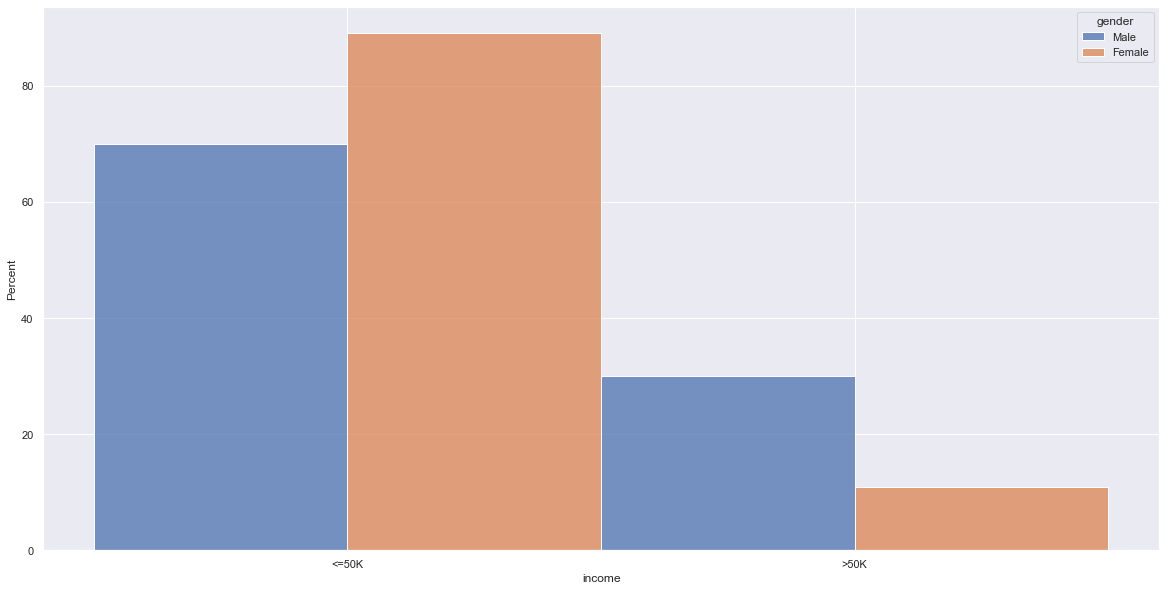

In [311]:
sns.histplot(x='income',hue='gender',data=df,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

Neste caso, não é necessário tanto cuidado quanto quando falávamos de etnia, pois a distribuição de gênero é, geralmente, em torno de $50\%$ para cada. É claro, neste dataset temos uma predominância masculina, mas não é tão grande quanto a predominância étnica.

Portanto, aqui podemos ver uma clara tendência: a parcela rica da população masculina é maior que a feminina, sendo quase o triplo, com a masculina em torno de $25\%$ e a feminina em torno de $10\%$.

#### Estado Civil e renda (`marital-status` e `income`)

<AxesSubplot:xlabel='income', ylabel='Percent'>

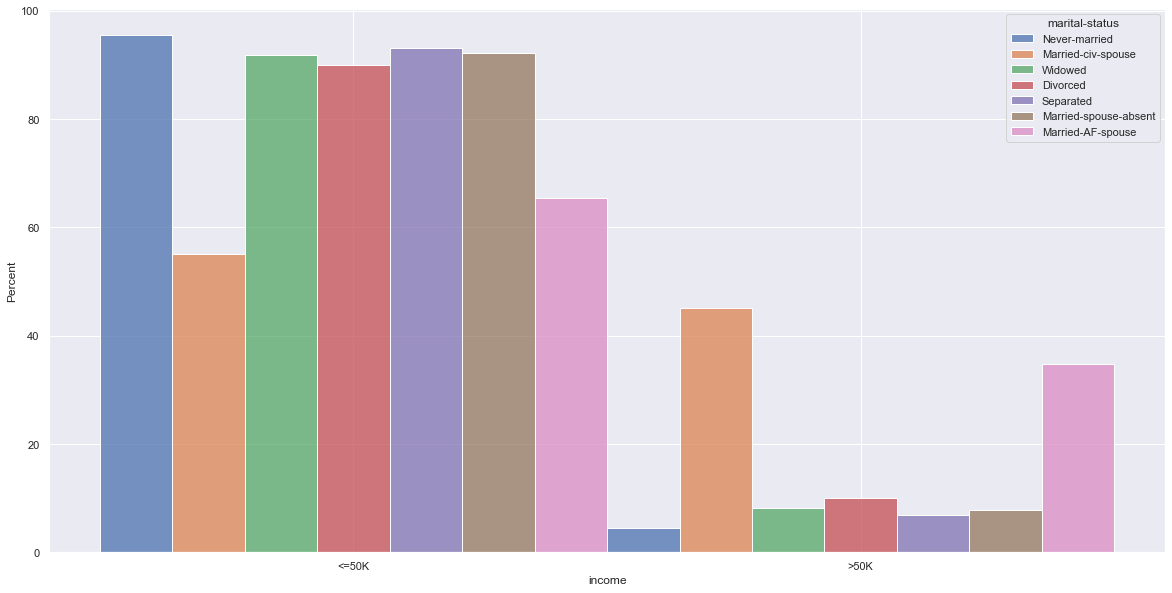

In [10]:
sns.histplot(x='income',hue='marital-status',data=df,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

Notavelmente, a população de casados é aque tem a maior parcela de alta renda. Porém, isso pode não ser muito significativo:

O casamento é um processo que envolve muito gasto - em especial nos EUA, que é costume dar alianças com diamantes caríssimos e as cerimônias são superfaturadas, além de todo o processo de mudança e adaptação - e então, apenas pessoas em boa condição financeira têm casamentos estáveis. Logo, pode ser o caso que a população não é mais rica _porque_ ela é casada, mas sim ela é casada porque ela é mais rica.

#### Relacionamento com a famíla e renda (`relationship` e `income`)

<AxesSubplot:xlabel='income', ylabel='Percent'>

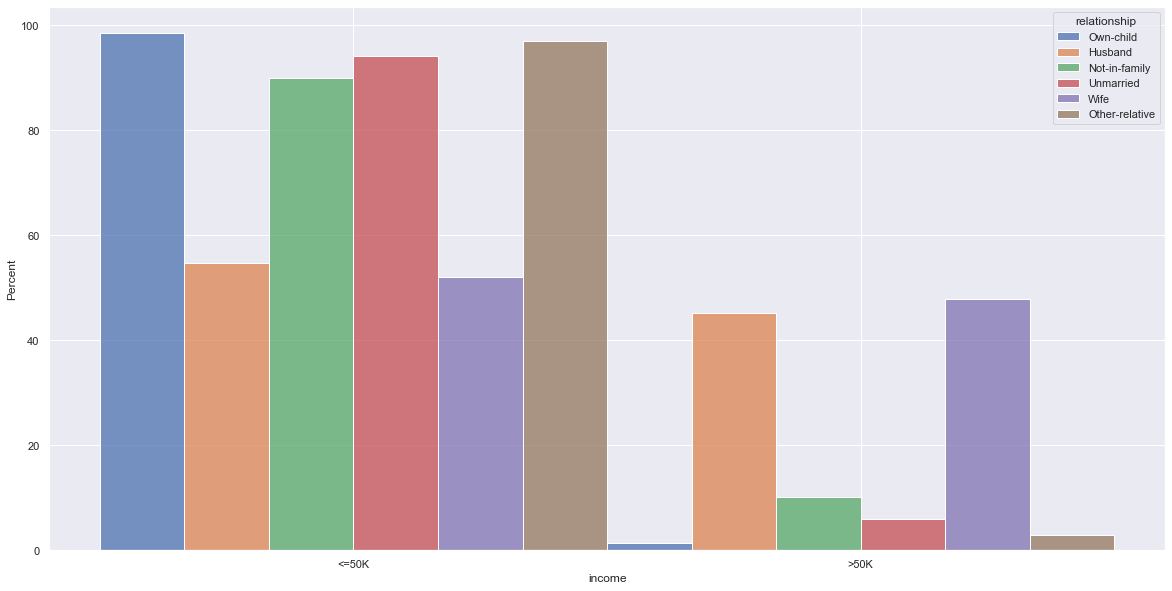

In [18]:
sns.histplot(x='income',hue='relationship',data=df,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

Percebe-se o mesmo fenômeno que antes, que pessoas casadas (nesse caso, marios e esposas), têm a maior parcela de pessoas ricas, proporiconalmente. 

Sobre o grupo dos filhos e filhas (`Own-child`), ele será analisado mais para frente.

Pode parecer que mulheres tendem a ganhar mais - o que contradiz a análise de gênero - porém há mais homens nos dados e nem todos eles são casados (vide a distribuição de relações por gênero, abaixo). O que ocorre é que há mais esposas de alta renda do que maridos, não que homens em geral.

<AxesSubplot:xlabel='gender', ylabel='Percent'>

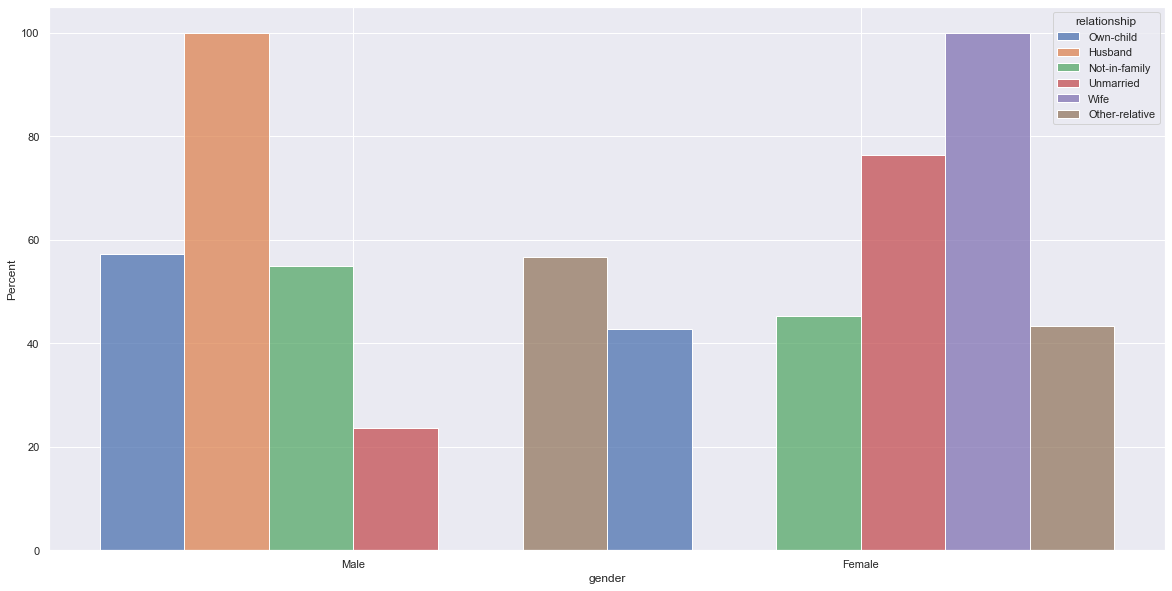

In [21]:
sns.histplot(x='gender',hue='relationship',data=df,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

#### Classe de trabalho e renda (`workclass` e `income`)

Podemos remover os que nunca trabalharam e os que não ganham nada, pois queremos saber quanto a renda.

<AxesSubplot:xlabel='income', ylabel='Percent'>

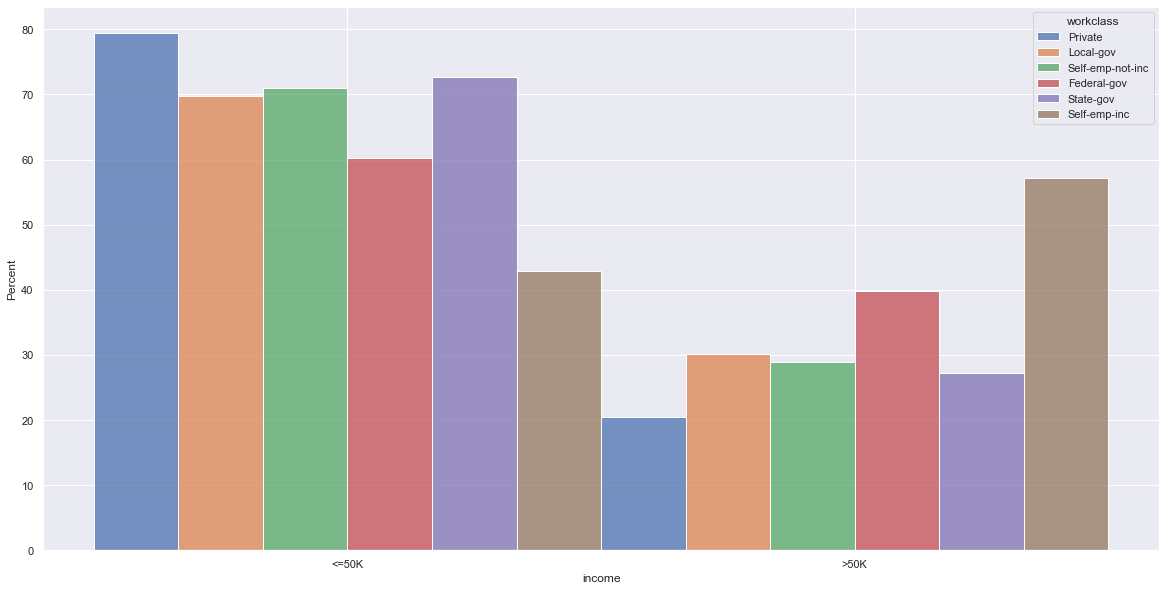

In [314]:
dfclass = df.query('workclass != "Never-worked"')
dfclass = dfclass.query('workclass != "Without-pay"')

sns.histplot(x='income',hue='workclass',data=dfclass,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

Verifica-se que o grupo com a maior parcela de pessoas com alta renda ($\approx 57\%$) são os auto-empregados e incorporados, ou seja, os donos e sócios de corporações e empresas. Os cargos públicos ficam em segundo lugar, com os federais sendo mais ricos (próximo de $40\%$). 

Os auto-empregados não incorporados - grupo que contém _freelancers_ e donos de pequenos negócios - está próximo, mas levemente acima, dos cargos públicos a nível estadual e local. Por último, ficam os empregados de cargos privados ($20\%)$.

Isso indica que os mais ricos tendem a ser detentores de capital, ou seja, os que ganham por meio de investimentos e lucro no lugar de ganhar por meio de salários. Até mesmo os donos de pequenas empresas ganham mais que o empregado privado, a classe que mais depende de salários. O fato de funcionários públicos estarem acima é provavelmente devido a seus salários serem bem elevados, e pelo fato de que são muitas as pequenas empresas que não dão muito lucro ou até vão a falência.

É importante ressaltar que o grupo dos empresários incorporados é o segundo menor em população, só sendo menor que os funcionários federais; enquanto os funcionários privados são a esmagadora maioria.

 #### Ocupção e renda (`occupation` e `income`)

<AxesSubplot:xlabel='income', ylabel='Percent'>

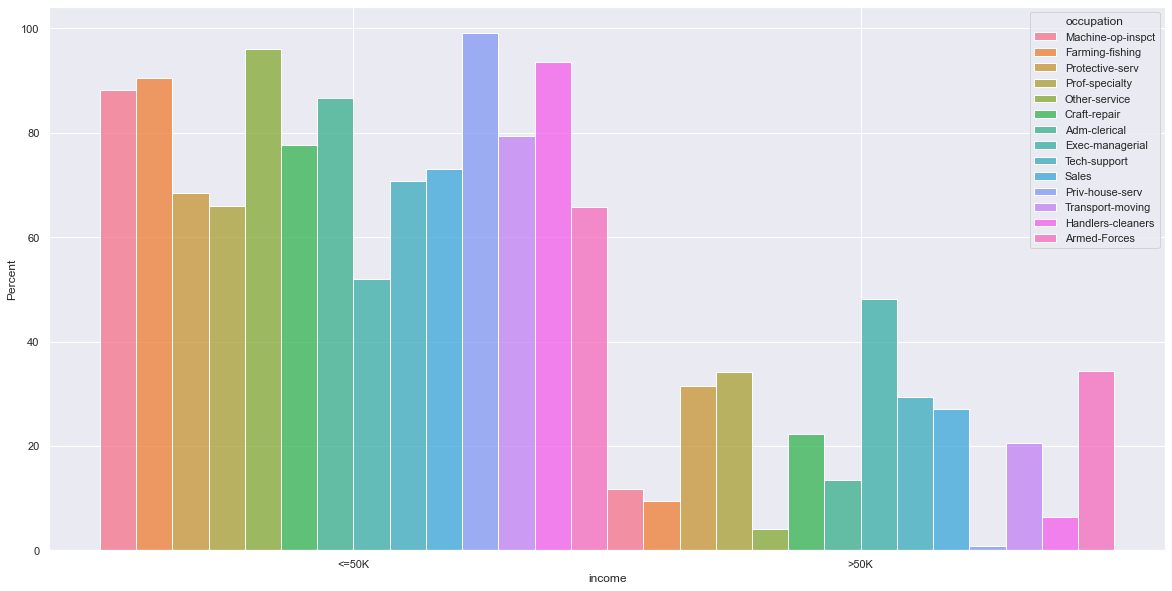

In [317]:
sns.histplot(x='income',hue='occupation',data=df,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

Novamente, vemos que os mais favorecidos são os cargos executivos, o que é esperado, por ser a mesma dos empresários. Além disso, trabalhos com menos requerimentos de nível educacional (como serviço doméstico e agropecuária) são menos ricos, o que corrobora com o fato da maioria das pessoas terem nível educacional alto, já que há um incentivo financeiro para a educação.

Não no sentido que "aqueles que estudam mais, ganham mais", mas sim que aqueles que estudaram pouco tendem a poder ocupar apenas cargos que ganham menos.

#### Escolaridade e renda  (`education` e `income`)

<AxesSubplot:xlabel='income', ylabel='Percent'>

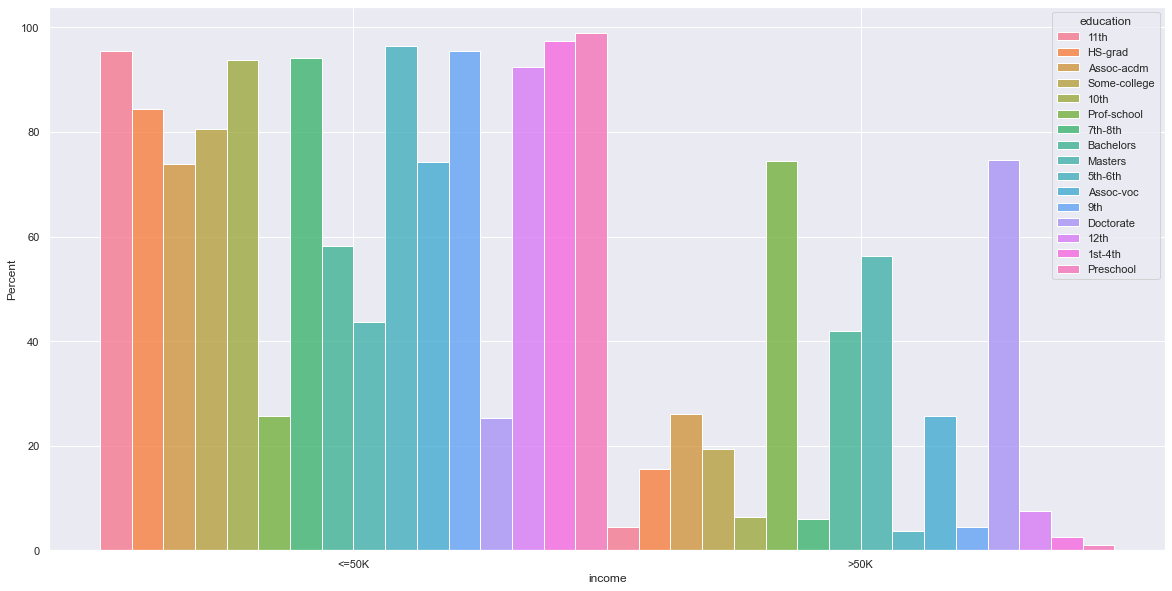

In [9]:
sns.histplot(x='income',hue='education',data=df,common_norm=False,weights='fnlwgt',multiple='dodge',stat='percent')

Apesar que pessoas com escolaridade até o ensino médio serem semelhantes em renda (quem estuda mais, não necessariamente ganha mais), aqueles que cursaram greduação (apenas bacharelado) e pós-graduação têm uma tendência a serem de alta renda.

## Análise de features contínuas e categóricas

Para determinarnmos melhor as características que influenciam na renda final, precimos combinar as features contínuas e categóricas. Uma pergunta para começarmos é: "de onde vem a renda da população?". Pois, uma pessoa pode ganhar renda por meio de salários ou por meio de retornos de investimentos. 

Para responder isso, uma boa análise seria comparar a renda com o ganho de capital. Assim, sabemos se quem ganha muito faz isso por meio de capital extrassalarial ou não.

Os próximos plots KDE estarão normalizados, assim como os histogramas. A diferença é que estão normalizados de tal forma que a densidade totaliza $1$ e não $100\%$. Agora que estamos trabalhando com features numéricas, podemos usá-lo!

#### Ganho extrassalarial e renda (`capital-gain` e `income`)

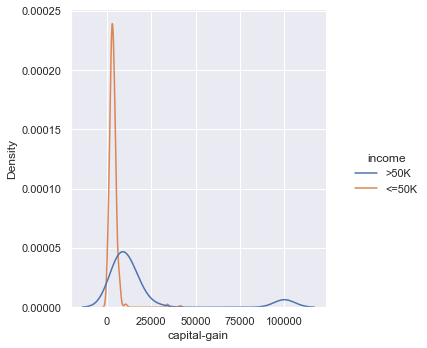

In [320]:
df1 = df.query('0<`capital-gain`')

sns.displot(x='capital-gain',hue='income',data=df1,kind='kde',common_norm=False,weights='fnlwgt')

Percebe-se uma altíssima concentração de pessoas que ganham menos na região de ganho extrassalarial nulo.

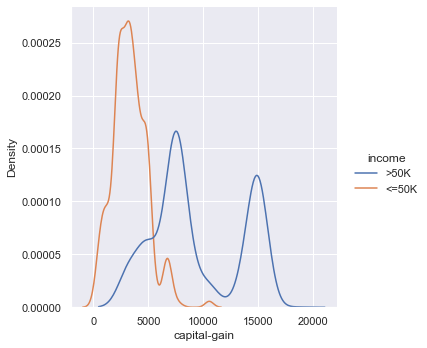

In [321]:
df1 = df.query('0<`capital-gain`<20000')

sns.displot(x='capital-gain',hue='income',data=df1,kind='kde',common_norm=False,weights='fnlwgt')

Mesmo entre os que de ganhoa cima de zero, a maioria dos que ganham menos também têm menor ganho extrassalarial. Porém, já há uma quantia considerável de pessoas de alta renda com ganho extrassalarial na faixa de $5000$ a $10000$.

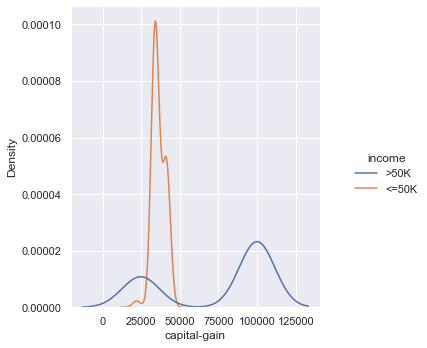

In [322]:
df1 = df.query('20000<`capital-gain`')

sns.displot(x='capital-gain',hue='income',data=df1,kind='kde',common_norm=False,weights='fnlwgt')

Olhando as pessoas que têm alto ganho extrassalariam, é possível notar que as pessoas de renda mais baixa também são se concentram na região de ganho extrassalarial mais baixa.

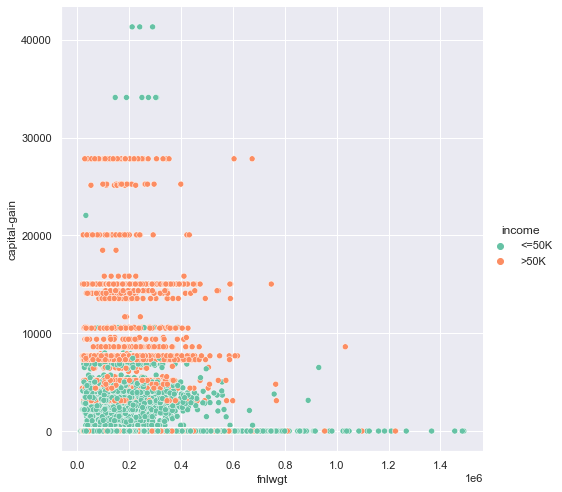

In [334]:
df1 = df.query('`capital-gain`<50000')

sns.relplot(y='capital-gain', x='fnlwgt', data = df1, kind='scatter',hue='income', palette='Set2',alpha=1, height = 7)

Este scatter plot também mostra bem o que ocorre. A concentração de pontos é verdes é muito maior nas regiões de baixo ganho extrassalarial, e a região que concentra mais pontos laranjas é uma região de maior ganho extrassalarial!

Excluí todos os pontos acima de $50000$, pois é evidente que esses terão renda acima de $50000$.

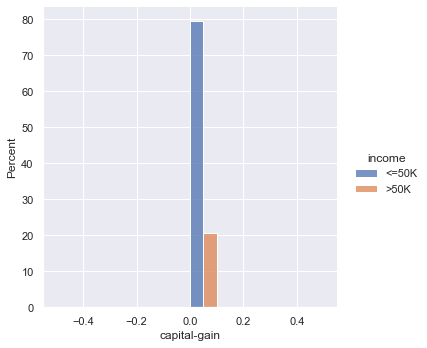

In [330]:
dfzero = df.query('`capital-gain`==0')

sns.displot(x='capital-gain',hue='income',data=dfzero,kind='hist',weights='fnlwgt',multiple='dodge',stat='percent',bins=10)

Finalmente, ao olharmos apenas o grupo de ganho nulo (que é a maioria), percebemos que apenas $20\%$ dessa população é de alta renda!

<br>

#### Horas de trabalho semanais e renda (`hours-per-week` e `income`)

Agora, é interessante ver a ligação entre a renda e a jornada de trabalho.

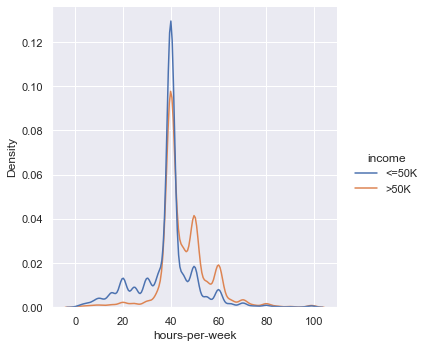

In [276]:
sns.displot(x='hours-per-week',hue='income',data=df,kind='kde',common_norm=False,weights='fnlwgt')

Aqui, parece que a população de maior renda também é a que tende a dedicar mais horas ao trabalho.

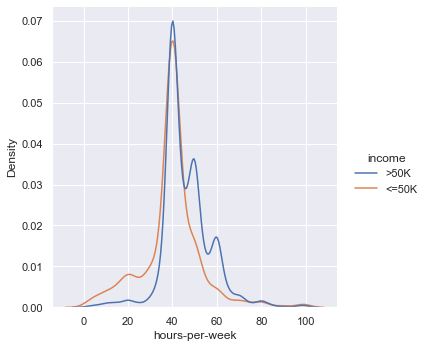

In [341]:
df1 = df.query('0<`capital-gain`')

sns.displot(x='hours-per-week',hue='income',data=df1,kind='kde',common_norm=False,weights='fnlwgt')

Porém, ao removermos as pessoas de ganho nulo, percebemos que os mais ricos tendem a trabalhar menos! Isso pois o gráfico amarelo está mais deslocado para a direita. Ainda sim, a maioria trabalha a médiade $40$ horas semanais.

Provavelmente isso é devido ao seu maior ganho de capital, que permite essa população se manter trabalhando menos.

<br>

#### Ganho extrassalarial e etnia (`capital-gain` e `race`)

<AxesSubplot:xlabel='capital-gain', ylabel='Percent'>

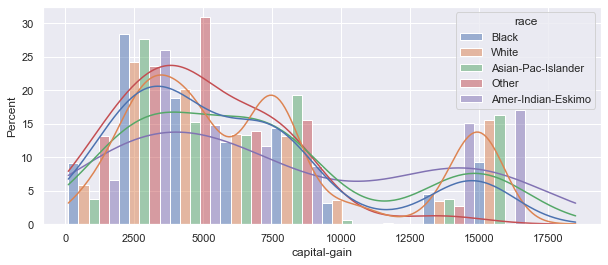

In [345]:
df1 = df.query('0<`capital-gain`<20000')

sns.set(rc={"figure.figsize":(10, 4)})

sns.histplot(data=df1,x='capital-gain', hue='race',weights='fnlwgt', common_norm=False,stat='percent',kde=True,multiple='dodge',bins=10)

Os resultados são um pouco semelhantes à análise de renda. Pessoas brancas são as que proporcionalmente mais ganham além de seus salários - o que bate com serem um dos grupos com maior parcela de renda alta - pois tem a maior parcela de pessoas que ganha mais de $10$ mil dólares. A que possui menor ganho extrassalarial é a etnia negra (o grupo de "outras" tem ganho menor ainda, porém são uma parcela muito pequena e pouco significativa, por conter diversas etnias).

Dessa vez, a etnia _asian and pacific islander_ não liderou em ganho extrassalarial, diferente de renda; com pessoas indígenas acima.

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

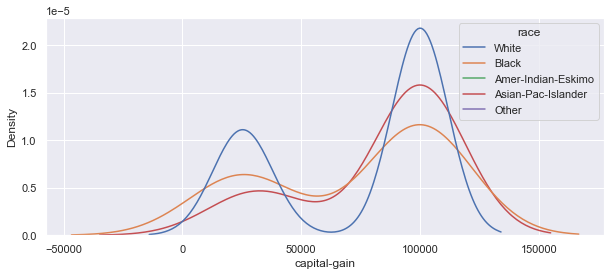

In [30]:
sns.set(rc={"figure.figsize":(10, 4)})

df1 = df1 = df.query('20000<`capital-gain`')

sns.kdeplot(data=df1,x='capital-gain', hue='race',weights='fnlwgt', common_norm=False, warn_singular=False)

O resultado é semelhante quando olhamos aos de ganho extremo (acima de $20$ mil dólares), porém as etnias indígenas e outras quase não estão presentes.

#### Idade e renda (`age` e `income`)

<AxesSubplot:xlabel='age', ylabel='Percent'>

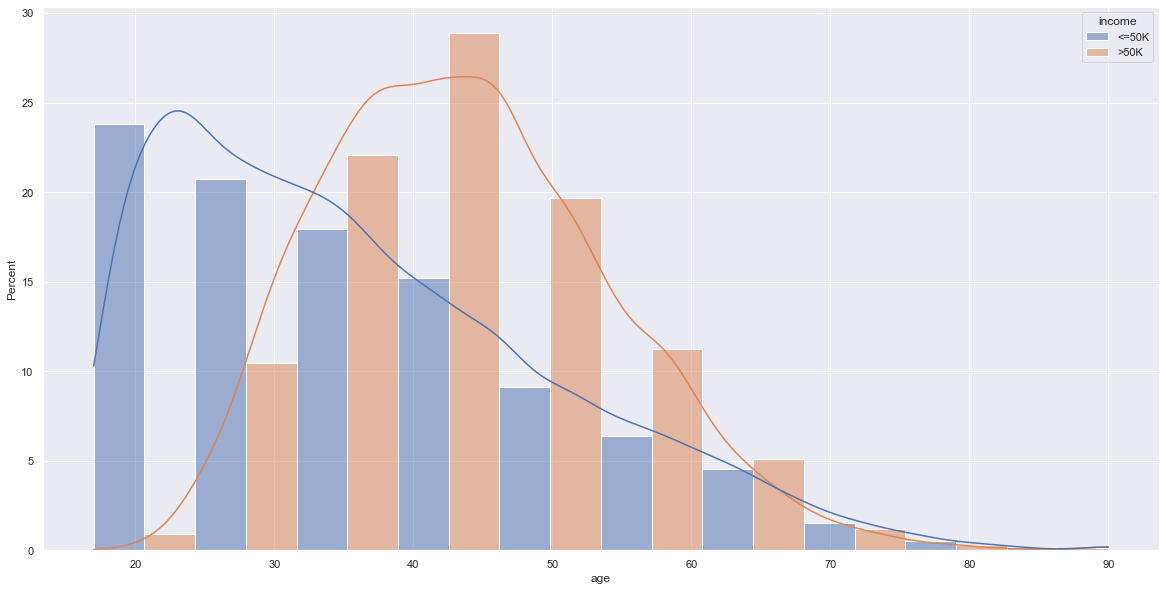

In [4]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.histplot(data = df, x='age',hue='income', weights='fnlwgt',bins=10,multiple='dodge',kde=True,stat='percent',common_norm=False)

Aqui vemos um fenômeno interessante. A distribuição de pessoas com alta renda é quase uma gaussiana; ela se concentra um pouco acima da média de idades. Ou seja, entre os mais ricos, as idades são bem distribuídas. Porém, entre os menos ricos, há uma maioria de pessoas mais novas (gaussiana deslocada para a esquerda). 

Isso indica que, conforme uma pessoa vai ficando mais velha, há uma tendência de ela se tornar mais rica, pois há menos pessoas velhas no grupo menos rico.

#### Idade e relação com a família (`age` e `relationship`)

<AxesSubplot:xlabel='age', ylabel='Count'>

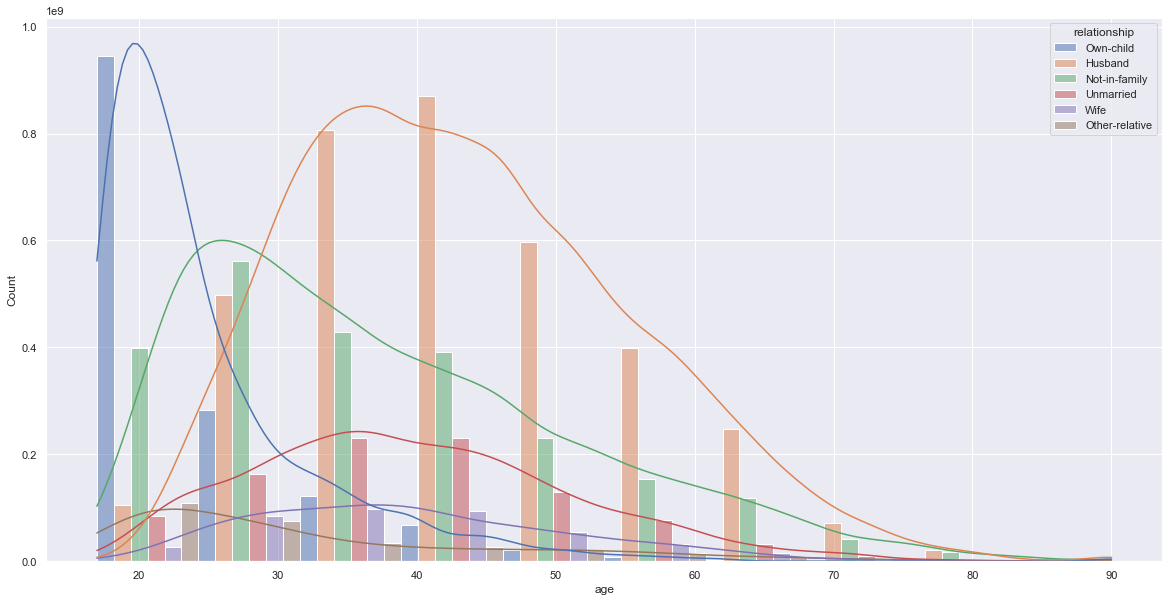

In [34]:
sns.histplot(data = df, x='age',hue='relationship', weights='fnlwgt',bins=10,multiple='dodge',kde=True)

Voltamos para os filhos e filhas (`Own-child`). Como podemos ver, esse grupo se concentra bastante entre pessoas mais novas, e, por isso, são menos ricas. Isso explica o fato de serem muito concentradas na faixa de `>=50k`!

Adicionalmente, há uma tendência de pessoas se casarem ou morarem sozinhas (porém solteiras) conforme envelhecem: o grupo de filhos/as e de pessoas fora de uma família reduzem conforme a idade aumenta, enquanto os grupos de maridos, esposas e solteiros/as exibem comportamentos quase gaussianos em torno da média (os últimos dois grupos têm gaussianas achatadas por serem pouco volumosos).

#### Ganho extrassalarial e gênero (`capital-gain` e `gender`)

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

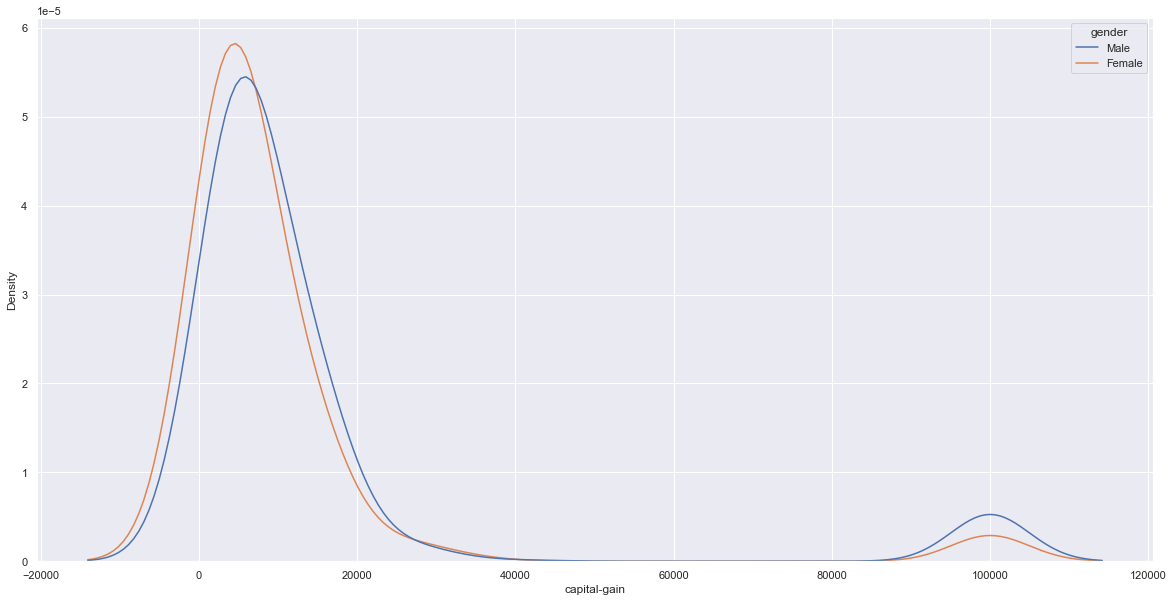

In [48]:
df1 = df.query('0<`capital-gain`')

sns.kdeplot(data=df1,x='capital-gain', hue='gender',weights='fnlwgt', common_norm=False)

Nota-se que mulheres tendem a ter um menor ganho extrassalarial.

#### Ganho extrassalarial e ocupação (`capital-gain` e `occupation`)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

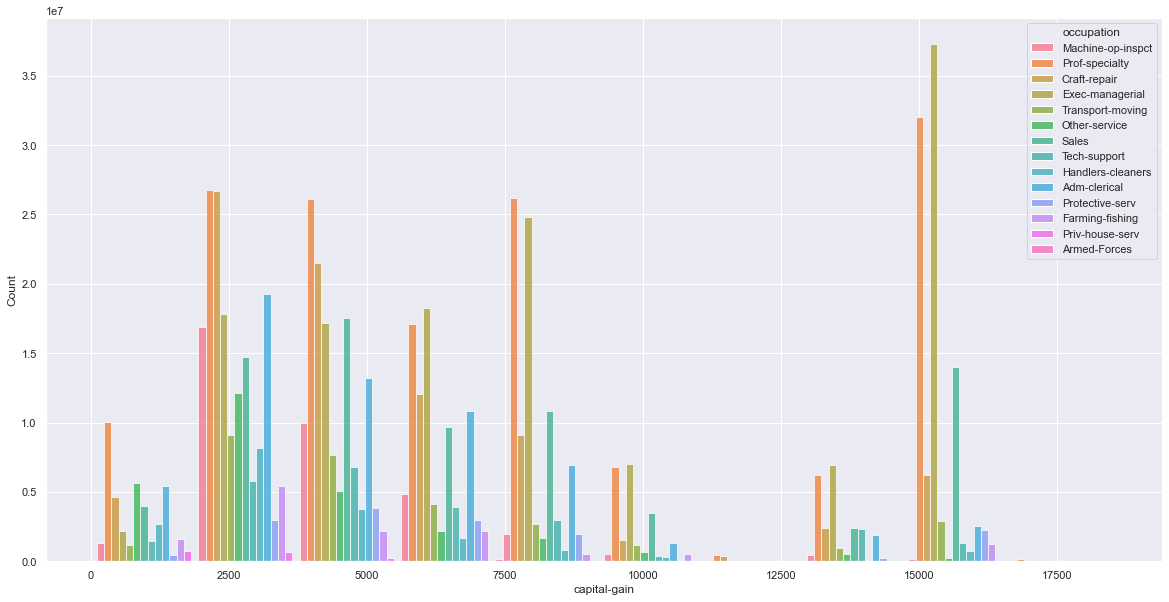

In [62]:
df1 = df.query('0<`capital-gain`<20000')

sns.histplot(data=df1,x='capital-gain', hue='occupation',weights='fnlwgt', common_norm=False, bins=10,multiple='dodge')

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

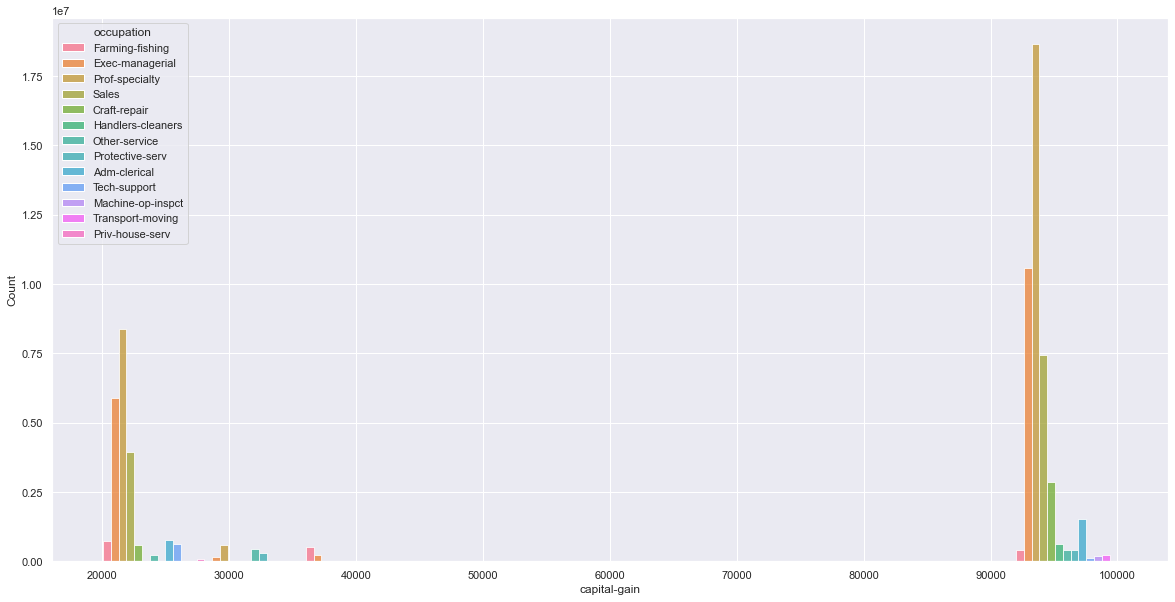

In [63]:
df1 = df.query('20000<`capital-gain`')

sns.histplot(data=df1,x='capital-gain', hue='occupation',weights='fnlwgt', common_norm=False, bins=10,multiple='dodge')

Percebe-se que as regiões de maior ganho são populadas por cargos executivos, vendas e especialistas, o que é esperado: cargos como esses geralmente não dependem muito de salário, mas sim de retorno de investimentos.

## Conclusão

Em síntese, é possível notar que há algumas tendências sérias quanto à renda de cada pessoa. Na população estudada, uma minoria tem renda acima de $50$ mil dólares, e essa renda se concentra naquela população que detém capital - ou seja, pessoas que ganham por meio de retornos de investimentos: empresários e investidores - e não na que ganha por salários. Isso provavelmente se deve ao modo como a economia do país é estruturada, de tal forma que favoreça essa classe econômica em detrimento da classe trabalhadora privada - com inferiores direitos trabalhistas, por exemplo - apesar de não piorar muito para funcionários públicos.

Levando em consideração apenas horas de trabalho - pois, não temos dados em algo como _intensidade de trabalho_ ou _produtividade_ - é possível deduzir que não se trata de uma sociedade meritocrata, pois não há uma correlação muito forte entre quantidade de trabalho (isto é, horas de trabalho semanais) e renda. A verdade é que, entre os mais ricos, trata-se do contrário: são pessoas que trabalham _menos_. A educação, no entanto, aparenta ser recompensada com uma renda mais alta - porém não proporcionalmente.

Quanto à aspectos individuais e não diretamente econômicos, fica claro que certas etnias são mais ricas. A etnia branca é a mais rica - considerando tanto renda quanto em ganhos extrassalariais -  e a negra uma das mais pobres, junto com indígenas. Além disso, há uma clara diferença de renda entre gêneros, com homens sendo mais ricos. Seria de extrema irresponsabilidade chegar a qualquer conclusão sobre a natureza dessas desigualdades baseando-se puramente nessas estastísticas aqui apresentadas; porém, levando em consideração a história do país, o histórico de escravidão e segregação, além de desigualdades de gênero, os dados corroboram com uma tese que apresente como causa dessas disparidades o preconceito e a opressão. Tal análise, no entanto, com certeza deve ser feita mediante uma pesquisa histórico-sociológica.

Dito isso, podemos descrever o  perfil do cidadão médio com renda acima de $50$ mil dólares como um homem, mais velho, em torno de $30$ a $40$, casado, branco, em alguma posição executiva, auto-empregado e integrado a alguma corporação, graduado ou até pós-graduado, que trabalha um pouco menos de $40$ horas semanais.